# Sequence Comparison with LingPy

# 用LingPy进行序列比较

LingPy 是一套开源 Python 模块，用于定量历史语言学中的序列比较、距离分析、数据操作和可视化方法。

基本上，本教程假设您至少具备本科水平的历史语言学理解（特别是历史语言比较中使用的基本方法，通常归纳为“比较法”），仅需要具备Python和命令行操作的基本知识。

该教程分为以下几个部分：

1. 数据操作：准备、加载和测试词表数据
2. 语音对齐
3. 自动同源词检测
4. 评估
5. 数据导出

This tutorial will run you through the major steps needed in order to infer cognates automatically with [LingPy](http://lingpy.org) ([List and Forkel 2017](http://bibliography.lingpy.org?key=List2017i)) from linguistic word list data and to export the data into various formats so that you can either inspect them using tools like the [EDICTOR](http://edictor.digling.org) ([List 2017](http://bibliography.lingpy.org?key=List2017d)), or further analyse them, using software like [SplitsTree](http://splitstree.org) ([Huson 1998](http://bibliography.lingpy.org?key=Huson1998)) or [BEAST](http://www.beast2.org) ([Bouckaert et al. 2014](http://bibliography.lingpy.org?key=Bouckaert2014)).

Basically, this tutorial assumes that you have at least an undergraduate level understanding of historical linguistics (particularly the basic methods used in historical language comparison, often summarized under the label "comparative method"), requiring only working knowledge of Python and command line operation.

It is required that you have installed both LingPy in the version [2.6](https://github.com/lingpy/lingpy/releases/tag/v2.6) for Python3 (as this tutorial will assume that you use Python3) available on [GitHub](https://github.com/lingpy/lingpy), and (as a plus) the [python-igraph](http://igraph.org) package ([Csárdi and Nepusz 2006](http://bibliography.lingpy.org?key=Csardi2006)). Furthermore, in order to follow all examples given in this tutorial, it is useful to work with the [IPython](http://ipython.org) suite, which is very convenient for testing code pieces directly against the Python interpreter.

The tutorial is divided into different blocks, during which different aspects of sequence comparison will be illustrated from the concrete perspective of LingPy. In order to understand fully all that is going on, however, this tutorial won't be sufficient, and it is recommended that those who are interested in the algorithmic and conceptual details of LingPy's major algorithms for sequence comparison have a closer look at the book [Sequence Comparison in Historical Linguistics](https://sequencecomparison.github.io) ([List 2014](http://bibliography.lingpy.org?key=List2014d)) in which the most comprehensive state of the art is reflected. More recent papers might occasionally be mentioned in order to account for those aspects of sequence comparison which have been changed since then, but the book on sequence comparison (which is also freely available for download) is still the best starting point.

The tutorial is divided into the following parts:

1. Hands on the Data: Preparing, Loading, and Testing Word List Data
2. Phonetic Alignment
3. Automatic Cognate Detection
4. Evaluation
5. Exporting the Data

## 1 Installation Instructions

### 1.1 Confirming that Python and LingPy are not installed

In order to proceed with LingPy installation, make sure you have at least a standard Python interpreter installed. Open a command prompt and run the command below, which, if Python is installed, will return a message informing the version of Python that is installed (something similar to `"Python 2.7.12"`).

```shell
$ python --version
```

In case you are using or planning to use Python 3, the command below will return something like `"Python 3.5.2"`.

```shell
$ python3 --version
```

To verify if LingPy is installed you can either run your Python interpreter and try to load the library with `import lingpy` (which will return an `ImportError` if the library is missing) or copy and paste the command below to your command prompt (changing `python` to `python3` if needed).

```shell
$ python -c "import pkgutil; print('LingPy is installed' if pkgutil.find_loader('lingpy') else 'LingPy is not installed')"
```

In [1]:
import importlib.util
print('LingPy is installed' if importlib.util.find_spec('lingpy') else 'LingPy is not installed')


LingPy is installed


### 1.2 Updating and preparing the system

Before proceeding with LingPy installation, make sure your system is up to date. Here we reproduce the commands for the most common Linux distributions, but most of them have similar or equivalent commands.

```shell
sudo apt update && sudo apt upgrade # for Debian/Ubuntu Systems
yum update # for Fedora
pacman -Syu # for Arch systems
```

Following the best practices of Python development, we recommend you install LingPy and all its dependencies with the `pip` package manager. `pip` is included in all recent version of Python, but your distribution might have removed it. You can check if `pip` is installed by running the command below, which should return a message like `pip 9.0.1 from /usr/local/lib/python3.5/dist-packages (python 3.5)` (depending on your setup, the command might be `pip3` for Python 3).

```shell
$ pip --version
```

If `pip` is not installed, we recommended that you [properly install `pip` according to its instructions](https://pip.pypa.io/en/stable/installing/) instead of relying on your distribution repositories, which might be outdated and can lead to errors and conflicts. If you want to use Python3, but have also Python2 installed (which is the norm), make sure that `pip` is pointing to the correct Python version (on some machines, the Python3 version is, for example, called `pip3`).

### 1.3 Installing LingPy

The LingPy library can be installed either by using the packaged version on the Python Package Index (PyPI) or by making a full local copy of the development file on GitHub (some information can also be found at the [LingPy documentation page](http://lingpy.org/tutorial/installation.html)). The first alternative is recommended if you are new to Python and to LingPy, while the second is the best choice if you plan to contribute to LingPy development or alter it (in which case, however, you should be proficient enough with `git` to fork or branch the repository and should probably use a virtual environment). In any case, both alternatives work in the same way for the purposes of this tutorial.


#### 1.3.1 Installing from PyPi

The simplest alternative is to install LingPy using the standard software repositories (with `pip`) and installing locally (in the user directory, without superuser permission, with the `--user` flag) with the following command:

```shell
pip install --user lingpy
```

#### 1.3.2 Installing from git

When installing the development version (which most users won't need, we only mention it here for completeness) you will locally clone the `git` repositories and instruct `pip` to use the local copy as source, so that any changes to the code can immediately be used without having to package lingpy or submit a pull request to the authors. You must make sure you have `git` properly installed by running the `git --version` command and installing `git` if needed; in some systems, you will probably also need some development tools and libraries. For Debian/Ubuntu systems, everything should be installed with the command below:

```shell
sudo apt install git build-essential python-dev python3-dev
```

When all dependencies are installed, you can clone lingpy's repository and install it with `pip` in development mode:

```shell
git clone https://github.com/lingpy/lingpy.git
pip install --user -e lingpy
```

This command might take some time to finish, as it might need to download and install dependencies such as numpy, appdirs, etc. (those are listed in the `requirements.txt` file).

### 1.4 Configuring LingPy

If LingPy was not installed, it is recommended you import it one first time from the command line, so that it can configure itself and preprocess some data, such as sound profiles, graphemes, etc. Just enter the command below in your command line, which can result on a long list of information on the configuration phase; once it is finished, you should be ready to proceed with the tutorial:

```shell
$ python -c "import lingpy"
```

### 1.5 Installing additional software required for this tutorial

For all scripts in this tutorial to run, a couple of additional software tools will need to be installed. For automatic segmentation, you will need to install the *segments* package:

* https://github.com/bambooforest/segments/

This package can either be installed via git (from GitHub), or via PyPi.

For the Infomap cluster analyses, you will need the python-igraph package. If you want to test these analyses, please visit their homepage at [http://igraph.org/](http://igraph.org/) and see for further installation instructions, as they may vary from machine to machine, and they offer an excellent support.

### 1.6 Additional software, not required, but recommended

While not required, installing [IPython](http://ipython.org) should improve your experience when following this tutorial and with LingPy in general. Furthermore, when installing the whole [jupyter](http://jupyter.org/) suite, you will be able to launch this tutorial and follow all steps interactively.

## 2 Hands on the Data



### 2.1 The Testset

Linguists are often skeptical when they hear that LingPy requires explicit phonetic transcriptions, and often, they are even reluctant to interpret their data along the lines of the International Phonetic Alphabet. But in order to give the algorithms a fair chance to interpret the data in the same way in which they would be interpreted by linguists, a general practice for phonetic transcriptions is indispensable. 

For our test, we will use a dataset consisting of 30 Polynesian languages taken from the [ABVD](http://language.psy.auckland.ac.nz/austronesian/) ([Greenhill et al. 2008](http://bibliography.lingpy.org?key=Greenhill2008)). This dataset was intensively verified and revised according to primary source data from widely accepted published works (dictionaries and online databases) and first-hand knowledge of a Polynesian linguist. Revisions included: correcting invalid entries, reordering misplaced segments, adding missing segments, modifying ambiguous transcription conventions, and deleting semantically distant forms for concepts with multiple entries. The dataset was additionally cleaned by converting the various original transcriptions into a valid version of IPA accepted by LingPy (for details, see 2.4 below). The testset is located in the same folder in which you also find this interactive tutorial, which we provide in various formats. In the following, we will assume that you opened the terminal in this folder (or ``cd``ed into this folder after opening your terminal). 


### 2.2 The Input Format

Let us start by quickly examining the file `polynesian.tsv` which we prepared for this occasion. This file is a tab-separated text file with the first row indicating the header, and the very first column is reserved for numeric identifiers. If you open this file in a spreadsheet editor (and make sure to select "tab" as a delimiter, and NO characters to delimit a cell), will see that it is a very straightforward spreadsheet, in which the first row is a header indicating the names of the columns, and the first cell is reserved for an identifier, which should be numeric (but order does not matter).

|   ID | DOCULECT        | CONCEPT   | GLOTTOCODE   |   CONCEPTICON_ID | VALUE   | FORM   | TOKENS   | VARIANTS   | SOURCE                 |   COGID |
|-----:|:----------------|:----------|:-------------|-----------------:|:--------|:-------|:---------|:-----------|:-----------------------|--------:|
| 7435 | Anuta           | Eight     | anut1237     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 3591 | East_Futunan    | Eight     | east2447     |             1705 | valu    | valu   | v a l u  | valu       | POLLEX                 |     663 |
| 1401 | Emae            | Eight     | emae1237     |             1705 | βaru    | βaru   | β a r u  |            | 52375                  |     663 |
| 5359 | Futuna_Aniwa    | Eight     | futu1245     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 5614 | Hawaiian        | Eight     | hawa1245     |             1705 | walu    | walu   | w a l u  |            | 71458                  |     663 |
|  949 | Kapingamarangi  | Eight     | kapi1249     |             1705 | walu    | walu   | w a l u  | waru       | POLLEX                 |     663 |
| 2114 | Luangiua        | Eight     | onto1237     |             1705 | valu    | valu   | v a l u  |            | POLLEX                 |     663 |
| 1853 | Mangareva       | Eight     | mang1401     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
|  725 | Maori           | Eight     | maor1246     |             1705 | waru    | waru   | w a r u  |            | Biggs-85-2005          |     663 |
| 4201 | Mele_Fila       | Eight     | mele1250     |             1705 | eβaru   | eβaru  | β a r u  |            | 52375                  |     663 |
| 4855 | Niuean          | Eight     | niue1239     |             1705 | valu    | valu   | v a l u  |            | POLLEX                 |     663 |
| 3297 | North_Marquesan | Eight     | nort2845     |             1705 | va'u    | va'u   | v a ʔ u  |            | POLLEX                 |     663 |
| 6362 | Nukuria         | Eight     | nuku1259     |             1705 | varu    | varu   | v a r u  |            | Davletshin-1212-2015   |     663 |
| 6152 | Penryhn         | Eight     | penr1237     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 3897 | Pukapuka        | Eight     | puka1242     |             1705 | valu    | valu   | v a l u  |            | Salisbury-152-2005     |     663 |
| 1595 | Rapanui         | Eight     | rapa1244     |             1705 | va'u    | va'u   | v a ʔ u  |            | POLLEX                 |     663 |
| 5850 | Rarotongan      | Eight     | raro1241     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 4395 | Ra’ivavae       | Eight     | aust1304     |             1705 | vaGu    | vaGu   | v a ɢ u  |            | Tamaititahio-1213-2015 |     663 |
| 6914 | Rennell_Bellona | Eight     | renn1242     |             1705 | baŋgu   | baŋgu  | b a ŋg u |            | POLLEX                 |     663 |
| 5101 | Rurutuan        | Eight     | aust1304     |             1705 | vaʔu    | vaʔu   | v a ʔ u  |            | Meyer-128-2005         |     663 |
| 6623 | Samoan          | Eight     | samo1305     |             1705 | valu    | valu   | v a l u  |            | Blust-118-2005         |     663 |
| 3076 | Sikaiana        | Eight     | sika1261     |             1705 | valu    | valu   | v a l u  |            | POLLEX                 |     663 |
| 1169 | Tahitian        | Eight     | tahi1242     |             1705 | va'u    | va'u   | v a ʔ u  | varu       | Clark-173-2005         |     663 |
| 2823 | Tikopia         | Eight     | tiko1237     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 2336 | Tongan          | Eight     | tong1325     |             1705 | valu    | valu   | v a l u  |            | 117207                 |     663 |
| 4592 | Tuamotuan       | Eight     | tuam1242     |             1705 | varu    | varu   | v a r u  |            | POLLEX                 |     663 |
| 7179 | Tuvalu          | Eight     | tuva1244     |             1705 | valu    | valu   | v a l u  |            | 29903                  |     663 |
|    8 | Vaeakau_Taumako | Eight     | pile1238     |             1705 | valu    | valu   | v a l u  |            | Hovdhaugen-375-2009    |     663 |
|  251 | Wallisian       | Eight     | wall1257     |             1705 | valu    | valu   | v a l u  |            | POLLEX                 |     663 |


You may even prepare your data in a spreadsheet to then analyze it in LingPy. You just need to make sure to export it properly to the TSV format (which you can easily do by just copy-pasting it into an empty text-file). What you need to know about the format, however, is the following:

1. contrary to most linguists' intuition, the columns do **not** indicate languages: each row indicates one word and, as a result, language names need to be redundantly repeated
2. certain columns are **required** by LingPy, and their number can vary, depending on the task you want to carry out: for the purpose of cognate detection, you need at least the columns `doculect`, `concept`, and either a plain transcription (the default column name is `ipa`) or a more advanced and less ambiguous transcription in segmented form (the default column name is `tokens`).
3. in order to increase readability, column headers are upper-case when LingPy writes them to file, but this is not required (internally all columns are represented as lowercase when loaded into LingPy's objects).
4. depending on the names of the columns, values will be interpreted by default: if you have a column called `cogid`, this will be converted to an integer, and `tokens` usually assumes that you have a string separated by spaces. As a result, LingPy may throw an error if your columns do not follow these required formats. To check how columns are interpreted, you can check the file [wordlist.rc](https://github.com/lingpy/lingpy/blob/master/lingpy/data/conf/wordlist.rc) where you will find a full account of currently supported values.
5. users can add as many columns as they want, provided the file header is in alphanumeric form, and we have used this to add a field called "variants" in which we included forms that are obvious pronunciation variants in our data but should not be regarded by the algorithm. 

Not all of the columns in the table above are fully "standardized". The `DOCULECT` one, for example, so far only requires that distinct languages are given distinct names, no matter what those names contain (as long it has no tabulation stops). But for the purpose of exporting the data to other formats afterward, it is useful to restrict to alphanumeric names here, and to exclude all brackets or spaces from the language names (as well as quotes and diacritics), as we have been doing in this test set. This becomes especially important when inferring trees or using trees in further LingPy analyses: as trees are represented in the [Newick](https://en.wikipedia.org/wiki/Newick_format) format, where brackets play an important role, brackets in the names for the doculects will confuse the algorithm and raise an error. 

As the last point, note that we list `GLOTTOCODE` and `CONCEPTICON_ID`, which follows two major requirements for word list data we try to establish for the [Cross-Linguistic Data Formats (CLDF)](http://cldf.clld.org) initiative. As the linguistic sign has three major dimensions, the *language*, the *meaning*, and the *word form*, `GLOTTOCODE`, the language identifier provided by the [Glottolog project](http://glottolog.org) ([Hammarström, Forkel and Haspelmath 2017](http://bibliography.lingpy.org?key=Hammarstroem2017)) and `CONCEPTICON_ID`, the meaning identifier provided by the [Concepticon project](http://concepticon.clld.org) ([List, Cysouw, and Forkel 2016](http://bibliography.lingpy.org?key=List2016a)) cover two of these aspects, while the third aspect, the consistency of the form, is currently covered by LingPy (more on this below).
More information on the data formats employed in LingPy can be found at the official [documentation page](http://lingpy.org/tutorial/formats.html).

### 2.3 Loading the Data into a `Wordlist` Object

Loading the data into LingPy is straightforward. LingPy has a couple of classes which are specifically designed to handle word list data, and these classes provide all similar basic functions, plus additional ones for specific purposes:

* `Wordlist`: Basic class with core functionality, allows to read, modify, and write word list data, also allows  calculating distance matrices from cognate sets as well as rudimentary tree reconstruction functions (UPGMA, [Sokal and Michener 1958](http://bibliography.lingpy.org?key=Sokal1958), Neighbor-joining, [Saitou and Nei 1987](http://bibliography.lingpy.org?key=Saitou1987)).
* `Alignments`: Class allows to align all cognate sets in a word list. Requires one column which stores the cognate sets as well as a column for `doculect`, `concept`, and transcription (default: `ipa`) or user-defined *segmented transcription* (default: `tokens`). Alignments can be carried out in different ways, the algorithms follow the ones first described in [List (2012a)](http://bibliography.lingpy.org?key=List2012b).
* `LexStat`: Core class for automatic cognate detection, following the algorithm first described in [List (2012b)](http://bibliography.lingpy.org?key=List2012a) and later expanded in [List (2014)](http://bibliography.lingpy.org?key=List2014d), and [List, Greenhill, and Gray (2017)](List2017c). 
* `Partial`: Recent algorithm proposed in [List, Lopez, and Bapteste (2016)](http://bibliography.lingpy.org?key=List2016g), allows -- provided data is morpheme-segmented -- to search for partial cognates in the data.

We will start with the basic `Wordlist` object to illustrate some core facilities below. Let us thus quickly load some data into the Wordlist. We start with our file ```polynesian.tsv```:

加载TSV词表或字表

In [5]:
from __future__ import unicode_literals, print_function, division
from lingpy import *

# load the wordlist
#wl = Wordlist('polynesian.tsv')
wl2=Wordlist(r'D:\edictor\tests\data\head_Cognates.tsv')
# count number of languages, number of rows, number of concepts
print(
    "Wordlist has {0} languages and {1} concepts across {2} rows.".format(
        wl2.width, wl2.height, len(wl2)))

Wordlist has 236 languages and 300 concepts across 577 rows.


By accessing the attributes `width` we retrieve the number of languages and with `height` we retrieve the number of concepts. This follows the logic inherent in the traditional format in which linguists prepare their spreadsheets, namely by placing concepts in the first column and languages in the rest of the columns. Traditional linguistic databases would thus represent the data from the table above as follows:

CONCEPT | Emae | Rennell_Bellona | Tuvalu | Sikaiana | Penrhyn | Kapingamarangi
--- | --- | --- | --- | --- | --- | ---
one | tasi| tahi | tahi | tasi | tahi | dahi
five | rima | gima | lima | lima | rima | lima
eight | βaru | baŋu | valu | valu | varu | waru
... | ... | ... | ... | ... | ... | ...

The disadvantage of this annotation is, however, that we can only store one value in each cell, and we will create inconsistencies if we try to mix information per cell. For that reason, we maintain the strict tabular representation where each word is placed in one row, but internally, LingPy represents the data in multidimensional tables in which languages are thought to be placed in the columns and concepts in the rows. 

There are multiple ways in LingPy to inspect and manipulate data using the `Wordlist` class, but it would go too far to mention them all here, so we will restrict it to one example, by which we retrieve the values from the six languages above for the entry "Eight", using the `wordlist.get_dict()` function, and refer the users to a longer tutorial which is [online](http://lingpy.org/tutorial/lingpy.basic.wordlist.html).


In [ ]:
# 打印出“头”这个概念的所有词形'

head = wl2.get_dict(row='头', entry='FORM')

# 只取有词形的前 5 个
non_empty = [(lang, forms) for lang, forms in sorted(head.items()) if forms]
for lang, forms in non_empty[:5]:
    print(f"{lang:20}\t{', '.join(forms)}")



Aklanon             	úeo(h)
Amblau              	olo
Amblong             	batu-
Amis                	foŋoh, foŋoh
Anuta               	uru


In [ ]:
# get all indices for concept "eight", `row` refers to the concepts here, while `col` refers to languages
eight = wl.get_dict(row='Eight', entry='value')
for taxon in ['Emae', 'Rennell_Bellona', 
              'Tuvalu', 'Sikaiana', 'Penryhn',  'Kapingamarangi']:
    print(
        '{0:20}'.format(taxon), '  \t', ', '.join(eight[taxon]))

Emae                   	 βaru
Rennell_Bellona        	 baŋgu
Tuvalu                 	 valu
Sikaiana               	 valu
Penryhn                	 varu
Kapingamarangi         	 walu


Wordlists are the core format of data representation in LingPy, and it is useful for users who want to make advanced use of the library, to acquaintain them more with the way the data is handled here. More information can be found in the [online documentation](http://lingpy.org/tutorial/lingpy.basic.wordlist.html).

### 2.4 Segmentation of Phonetic Entries

Converting transcription conventions into IPA is critical for ensuring that the dataset can be properly analysed. In the original Polynesian dataset, for example, multiple inconsistent conventions were discovered. These included outdated, pre-IPA, conventions; regional orthographic conventions; and individual linguist inventions. These resulted in highly ambiguous representations that could easily lead to incorrect interpretations of the data: characters associated with a given sound used to represent an entirely different sound (*h* used for glottal stop; *y* used for *θʸ*); one character used to represent various sound segments (*g* used for velar nasal, voiced velar stop, and voiced uvular stop); one set of characters used to represent multiple series of sound segments (two adjacent vowels used for adjacent like vowels, vowel-glottal stop-vowel, and long vowels); double characters used to indicate one segment (*ng* used for velar nasal; *nC* used for prenasalised consonants; *hC* or *Ch* used for aspirated consonants); diacritical marking on vowels used to indicate length (*v̄* used for long vowels); and diacritical marking on or between vowels to indicate glottal stops (*v̀* used for glottal stop-vowel; *v'v* used for vowel-glottal stop-vowel). Linguists applying methods for automatic cognate detection should always keep in mind that our data is usually rather sparse and therefore not robust enough to cope with these problems alone. As a result from our experience in working with the Polynesian data sample, we therefore advise all users of LingPy to make sure that their data is properly segmented. In the following we will provide some basic information, how this can be done.

In addition to the "normal" requirement of the data to be written in IPA, LingPy can use the explicit segmentation of the data into sound segments as it was provided by the user. Segmentation is represented as a space-separated string in the input data, as you can see when looking at the table above, right in the cells of the `TOKENS` column. While segmentation looks unspectacular in these cases where each sound is represented by only one symbol, it may become problematic when dealing with affricates, pre-aspirated sounds, and complex vowels. The problem is usually that IPA transcriptions are inherently ambiguous, and this ambiguity is then passed on to the algorithms which cannot handle it. For example, a word like German `[`apfəl`]` "apple" could be either segmented as `[` a p f ə l `]`, or, and historically more consistently, as `[` a pf ə l `]`. But if the latter reading is intended (and this is usually language-family-specific), the only way to handle this consistently in IPA would be to put the bar over it: `[`ap͡fəl`]`. This practice, however, would still render the detection of pre-aspiration and other cases impossible. Although LingPy deals rather well with explicit IPA, we recommend all users to segment the data themselves and indicate this by placing one column in their input word list, in which the phonetic entries are explicitly segmented by a space (with the underscore being used to mark original spaces, i.e., word breaks).

LingPy's [`sequence`-package](http://lingpy.org/reference/lingpy.sequence.html) offers many functions to handle phonetic sequences and to segment them automatically. As an example, consider the following code-pieces and try to find out what they are actually doing:

### 2.4 分隔语音单元

在 lingpy 中，tokens 是用于处理和分析语言数据的基本单元。它们在语言学数据处理和比较中具有重要作用。以下是 tokens 的主要作用：

1. 文本分割：tokens 用于将文本分割成更小的单元，可以更方便地进行统计分析和处理。

2. 比较分析：在历史语言学和比较语言学中，tokens 被用来比较不同语言或方言的词汇和音节。这有助于识别语言之间的相似性和差异，从而帮助研究语言的演变和关系。

3. 计算相似度：lingpy 提供了多种计算语言单元（如词或音节）相似度的算法。通过使用 tokens，可以计算出不同词汇或音节之间的相似度分数，这对于构建*语言树*或进行*聚类分析*非常有用。

4. 对齐和分析：在语言对齐任务中，tokens 被用于对齐不同语言或方言的对应词汇或音节。这对于研究音变规律和语言演变模式非常重要。

5. 数据规范化：tokens 也用于数据的规范化处理，例如去除标点符号、转换大小写等，以确保数据的一致性和可比性。

例如，在使用 lingpy 进行词汇比较时，可以将单词分割成音节 tokens，然后使用这些 tokens 进行音节级别的比较和对齐分析。

#### ipa2tokens（LingPy）

面向“已经是 IPA 的字符串”，用内置的 IPA 规则自动切分（识别附加符、合成符、半附加符等）。

特点：不用外部文件，适合“标准 IPA 已经比较规范”的数据；对歧义或非标准记音不一定正确。

In [ ]:
# 已经是 IPA 的字符串，将其转换为音素列表

from lingpy.sequence.sound_classes import ipa2tokens

seq1, seq2, seq3, seq4, seq5, seq6 = (
    "th o x t a", "thoxta", "apfəl", "tʰoxtɐ", "dɔːtər", "tsuŋ")

#print(seq1, "\t->\t", '\t'.join(ipa2tokens(seq1)))
print(seq2, "  \t->\t", '\t'.join(ipa2tokens(seq2, semi_diacritics="h")))
print(seq3, "  \t->\t", '\t'.join(ipa2tokens(seq3)))
print(seq3, "  \t->\t", '\t'.join(ipa2tokens(seq3, semi_diacritics="f")))
print(seq4, "  \t->\t", '\t'.join(ipa2tokens(seq4)))
print(seq5, "  \t->\t", '\t'.join(ipa2tokens(seq5)))
print(seq6, "  \t\t->\t", '\t'.join(ipa2tokens(seq6, semi_diacritics="s")))

You can see from these examples that LingPy's `ipa2tokens` function automatically identifies diacritics and the like, but that you can also tweak it to some extent. If the sequence contains white spaces, as in the first example, `ipa2tokens` will split by white space and assume that the data is *already* segmented. We won't go into the details of this and other functions here, but you should consider giving the documentation a proper read before you start spending time on segmenting your data manually. At the same time, when trusting LingPy's default algorithm for segmentation, you should always make sure after using it that the segmentations make sense. If they are largely wrong or problematic, you should refine them before running any automatic cognate detection method.

An alternative is to use the [`segments`](https://github.com/cldf/segments) package by Moran and Forkel (2017), whose main idea is more comprehensively described in [Moran and Cysouw (2017)](http://bibliography.lingpy.org?key=Moran2017). We have in fact been using it for our working example in order to segment the ABVD data on Polynesian languages properly and afterwards checked them manually. Our orthography profile for the Polynesian languages looks like this (we only show the first couple of lines):

Grapheme	| IPA |	NOTE
--- | --- | ---
q	| ʔ	| 
ŋg |	ⁿg	| account for pre-nasalization
0	| NULL	|
ng | ŋ	|
t |	t	|

So what you can essentially see here is that we have an initial column in which we list the graphemes that we find in the data, and we add a second column that says how we would like to render it in IPA. If we write "NULL", this means we want to discard it. With the [segments](https://github.com/bambooforest/segments) package, this can be applied to our data in a very straightforward way:

#### Tokenizer（segments）

依赖**“正字法 profile TSV”，按你给的规则把原始记音转换为 IPA 并切分。

跟上面的ip2tokens不同，这个针对还不是IPA记音的状况。

特点：能处理非标准/混用记音、历史拼写、方言记音等；可表达歧义、多候选（需要规则消歧）。

In [1]:
from segments.tokenizer import Tokenizer
from lingpy.basic.wordlist import Wordlist
tk = Tokenizer(r'C:\Users\sheng\OneDrive\文档\论文\LingPy\lingpy-tutorial\orthography.tsv')
print(tk("va'u"))
print(tk("îva'u", column="IPA"))
print(tk("vãĩõɔ̃ũ"))


v a ' u
î/ʔ î/iː v a ʔ u
v ã ĩ õ ɔ̃ ũ


### 生成正字法文件
下面这一行命令从方言材料中自动提取国际音标符号列表，并保存为profile，用于拆分国际音标为Tokens.Tokens用于语音对齐、计算同源词距离等。

$ lingpy profile -i data/P_profile-creation.tsv -o data/P_created-profile.tsv --column=ipa

你也可以将输入文件名P_profile-creation.tsv改成你的方言数据表文件的名称，生成的文件正字法文件名称P_created-profile.tsv改为任意其他的名称，如下面的代码中使用P_wenzhou-orthography.tsv。

有了这个正字法文件，就可以给每个音节进行拆分，Tokenizer的作用是给国际音标之间加上一个空格变成Tokens，用于音素对齐，转换成音类，然后进行分析比较，计算音节之间的相似度和距离。

In [9]:
from __future__ import unicode_literals, print_function, division
from lingpy import *
from segments.tokenizer import Tokenizer
from lingpy.basic.wordlist import Wordlist
tk = Tokenizer(r'C:\Users\sheng\OneDrive\文档\论文\LingPy\lingpy-tutorial\P_wenzhou-orthography.tsv')
wl2 = Wordlist('head_Cognates.tsv')
wl2.add_entries('new_segments', 'FORM', tk, column="IPA")
wl2.output('tsv', filename='HEAD_COGNATES-segments2', ignore='all')

2025-12-17 19:31:37,875 [INFO] Data has been written to file <HEAD_COGNATES-segments2.tsv>.


As you see, the data has been segmented and converted to IPA at the same time, which is very convenient, if the original data is not very well-represented in form of phonetic transcriptions. If you want to convert all segments in your data at once, thus modifying your Wordlist, you can do this in a very convenient way, using the ```wordlist.add_entries``` function: 

In [ ]:
wl.add_entries('new_segments', 'form', tk, column="IPA")
wl.output('tsv', filename='polynesian-new-segments', ignore='all')

In order to check how well the data has been converted, you could either open the output file ```polynesian-new-segments.tsv``` in a text editor or your favorite spreadsheet editor. You could also open the EDICTOR tool in your browser at [http://edictor.digling.org](http://edictor.digling.org) and drag the file into the BROWSE window, where you have many enhanced options on comparing and checking the data (for a recent EDICTOR tutorial, see [List 2017](http://bibliography.lingpy.org?key=List2017LECTUREc)).

If you want to check, how well the data has been converted so that LingPy can link the sounds to its internal representation, you can also do this with help of the ```check_tokens``` method:

In [3]:
from lingpy.sequence.sound_classes import check_tokens
tokens = "v a ' h u".split(' ')
errors = check_tokens(tokens)
for error in errors:
    print('Error in position {0[0]}: «{0[1]}»'.format(error))

Error in position 2: «'»


If you want to do this for all entries in your list, just iterate over all tokens, and store the errors in a dictionary, where you can also count them:

In [ ]:
from collections import defaultdict
errors = defaultdict(int)
for idx, tks in wl.iter_rows('tokens'):
    for error in check_tokens(tks):
        errors[error[1]] += 1
print(len(errors))

Luckily, we do not have any errors in our data.

### 2.5 Checking Coverage

For cognate detection, it is not only important to have good phonetic transcriptions (ideally segmented in such a form that they were checked by an experienced linguist), but also to make sure that there are **enough words** in your data. If the data is too sparse, even human linguists would not be able to find any signal based on regular sound correspondences, provided they see the languages the first time and don't know their history (which is the situation for every algorithm). Following an earlier study by [List (2014b)](http://bibliography.lingpy.org?key=List2014c), we know now that at least 100 word pairs for languages as disparate as English and French are needed to provide a solid basis for automatic cognate detection. But when dealing with a large dataset of different languages, which necessarily contains a number of gaps (not all concepts can be elicited in the sources, field work has not provided enough details, etc.), it can be deleterious if the *mutual coverage* between the languages is low. 

By mutual coverage, I mean the number of comparable word pairs (with the same concept) for each language pair in a given dataset. We can compare different aspects of mutual coverage, such as the *average mutual coverage平均互相覆盖率*, where we average the number of available word pairs, or the *minimal mutual coverage*, which provides the smallest mutual coverage of any pair of languages. In addition, one can also ask for the subset fulfilling a minimal mutual coverage for all language pairs, and this task would return the subset of languages in a `Wordlist` which all have at least the mutual coverage specified by the user. LingPy offers now (since version 2.5.1, see also the [online reference](http://lingpy.org/docu/compare/sanity.html)) solutions for all these problems, but since the last problem is considerably hard and computationally intensive, we won't discuss it here, but will instead simply check the minimal mutual coverage which holds for all languages in our sample. So we try to find the lower bound of concept pairs which all languages have in common.

### 2.5 检查平均互相覆盖率

假设我们有一个包含100个概念的词表，并且有两种语言（L1和L2），它们的词汇覆盖情况如下：

L1：有50个概念有对应的词，剩下50个概念没有对应的词。
L2：有70个概念有对应的词，剩下30个概念没有对应的词。
在数据库中，这意味着对于L1和L2的词表，有部分行是空的，因为某些概念在某种语言中没有对应的词。
而且L1的50个对应说法的概念跟L2的70个概念之间还只是部分重叠，比如两种语言都有说法的概念只有30个。

In [ ]:
from lingpy.compare.util import (
    mutual_coverage_check, mutual_coverage_subset)
for i in range(210, 0, -1):
    if mutual_coverage_check(wl, i):
        print(
            "Minimal mutual coverage is at {0} concept pairs.".format(i))
        break

This value is definitely good enough for our purpose, given the rule of thumb which says that below a minimal mutual coverage of 100 one should not do language-specific cognate detection analyses. If the coverage is lower, this does not mean you need to give up automatic cognate detection, but it means you should not use the language-specific `LexStat` method but rather a language-independent method, which does not require the information on potential sound correspondences (but will also tend to identify more false positives).

Another score that is useful to compute when carrying out these analyses is what is called *Average Mutual Coverage* (AMC) in LingPy. The AMC of a given wordlist is defined as the average of the number of concepts shared between all pairs of languages in a given wordlist divided by the number of concepts in total. The computation in LingPy is straightforward:

In [ ]:
from lingpy.compare.sanity import average_coverage
print('{0:.2f}'.format(average_coverage(wl)))

This value is in fact quite high, since we know that many other datasets that have been used in the past to test automatic cognate detection methods had a considerable amount of missing data and would therefore have an AMC score much lower than 0.8.

Although, as we just said, the value is good enough, we should further reduce the data a bit to make sure we can inspect them better later on (otherwise, the analyses may also take a lot of time if you run them on computers with insufficient power). So what we will do right now is testing the `mutual_coverage_subset` method which returns a subset of languages for which a given minimal mutual coverage holds. We will then export our `Wordlist` object to file by specifying these languages as our subset:

In [ ]:
count, results = mutual_coverage_subset(wl, 200)
coverage, languages = results[0]
print(
    'Found {0} languages with an average mutual coverage of {1}.'.format(
        count, coverage))

# write word list to file
wl.output("tsv", filename="polynesian-small",
          subset=True, rows=dict(doculect = "in "+str(languages)))

# load the smaller word list
wl = Wordlist('polynesian-small.tsv')

# print basic characteristics
print(
    "Wordlist has {0} languages and {1} concepts in {2} words.".format(
        wl.width, wl.height, len(wl)))

We could not further work with this selection of languages with a very high coverage, and it is always recommended to do so when working on diverse languages samples. For our further tests, however, we will restrict our selection of languages to another subset, namely the East Polynesian languages. Let us now extract those languages from the data (based on their language names) and then see how good the coverage is for this subset.

In [ ]:
eastern = ['North_Marquesan', 'Ra’ivavae', 'Rurutuan', 
            'Tahitian', 'Sikaiana', 'Maori', 'Hawaiian',
            'Mangareva', 'Tuamotuan', 'Rapanui'] 
wl = Wordlist('polynesian.tsv')
wl.output('tsv', filename='east-polynesian', subset=True,
            rows=dict(doculect = 'in '+str(eastern)))

wl = Wordlist('east-polynesian.tsv')
print(
    "East Polynesian data has {0} concepts and {1} languages.".format(
        wl.height, wl.width))

Let us now repeat the coverage experiment from above, but this time with the Eastern Polynesian language data.

In [ ]:
for i in range(210, 0, -1):
    if mutual_coverage_check(wl, i):
        print("Minimal mutual coverage is at {0} concept pairs (AMC: {1:.2f}).".format(
            i, average_coverage(wl)))
        break

Note that this coverage is much less than the coverage we encountered above. Nevertheless, for our purpose it will be good enough, and the rule of thumb for closely related languages, which says, that we need more than 150 concepts mutually shared between each language pair holds.


### 2.6 Checking for Synonyms

Extreme number of synonyms per concepts may drastically confuse the algorithms, so we should check and make sure that we do not have too many of them in our data. This can be conveniently done in Python:

In [ ]:
from lingpy.compare.sanity import synonymy
synonyms = synonymy(wl)
for (language, concept), count in sorted(
    synonyms.items(), key=lambda x: x[1], reverse=True):
    if count > 3:
        print('{0:15}  {1:12}  {2}'.format(language, concept, count))


You can see that we have some cases which we should be careful about. There are many ways to fall, but six words for "to fall" in North Marquesan are surely not satisfying.

## 3 Phonetic Alignment

In the main tutorial text, we explain the major aspects of alignment analyses. We won't repeat them here and recommend you to read them carefully in the main document instead. What we want to do here is quickly run you through the major aspects of alignments in LingPy. We will start with pairwise alignments and then introduce multiple alignments. Since multiple alignments are based on pairwise alignments, the major aspects, such as the scoring function, the gap function, and the representation of sound classes, are something you should always keep in mind, especially when you find that automatic alignments do not conform to your expectations.


### 3.1 Pairwise Alignment



#### 3.1.1 Scoring Function

The scoring function in pairwise alignments determines how segments are compared with each other. If the score is high, this means that the sounds are judged to be likely to be related, if it is below 0 (that is, if it has a negative score) this means that it is assumed that a relationship is unlikely. Scoring functions in LingPy are usually stored in so-called sound-class models. We will introduce sound classes in detail in the next section, so here it should be enough to mention that our scorers are not defined for pure IPA segments, but rather for subsets,  which make it more convenient to define scores for dissimilarities. Instead of comparing `[`tʰ`]` with `[`tʃ`]`, we internally compare ```T``` with ```C```, which is faster to compute, but also easier to define. In the following, we will work with the SCA-scorer, a scorer for the scoring function underlying the SCA algorithm ([List 2014](http://bibliography.lingpy.org?key=List2014d)). We can easily load the scorer in the following way:

#### 3.1.1 评分函数

在成对比对（pairwise alignments）中，评分函数（scoring function）决定了音段之间的比较方式。如果得分很高，这意味着这些音段被认为很可能是相关的；如果得分低于0（即负分），这意味着假设它们之间的关系不太可能。LingPy 中的评分函数通常存储在所谓的音类模型（sound-class models）中。我们将在下一节详细介绍音类。在这里，只需提到我们的评分器（scorers）不是为纯粹的国际音标（IPA）音段定义的，而是为子集定义的，这使得定义不相似的得分更为方便。与其将[tʰ]与[tʃ]进行比较，我们在内部将T与C进行比较，这样计算更快，而且定义起来也更容易。接下来，我们将使用SCA评分器，这是用于SCA算法（List 2014）的评分函数。我们可以通过以下方式轻松加载评分器：

Model 类：Model 是 LingPy 中的一个类，用于创建音位比较模型。模型包含了用于计算两个音位之间相似度的矩阵，称为评分矩阵（scoring matrix）。
SCA 模型：sca 是 Sound-Class-Based Phonetic Alignment 的缩写，是一种基于音类的音韵对齐模型。SCA 模型根据语言音段的分类（如辅音、元音等）计算它们之间的相似度，用于对词汇进行音韵对齐和比较。

In [ ]:
scorer = Model('sca')

More information on the underlying [Model](http://lingpy.org/docu/data/model.html) class can be found in LingPy's online reference. In order to test, how a given sound class compares to another one, we can conveniently call the scorer:

In [ ]:
for symA in ['P', 'T', 'A', 'E']:
    for symB in ['T', 'C', 'I']:
        print(symA, symB, scorer(symA, symB))

You can see, that, as a rule, vowels (```AEI```) and consonants (```PTC```) always get -10 as score. If consonants are not judged to be similar, they get a zero, but if we assume that there is a certain likelihood that sound change will create sound correspondences across classes, the scorer gives more detailed scores.

你可以看到，通常元音（AEI）和辅音（PTC）总是得到-10的分数。如果辅音不被认为是相似的，它们的得分是零，但如果我们假设声音变化在不同类别之间会产生一定的对应关系，那么评分器会给出更详细的分数。

## 解释
这段话讨论了一个评分系统的规则，具体如下：

*元音和辅音的基础得分：*
1. 元音（如A、E、I）和辅音（如P、T、C）在默认情况下都会得到一个基础分数-10。这说明它们在某种标准下被评定为相似或相关的基础分数。
2. 辅音相似度判断：如果辅音被判断为不相似，它们的得分是零。这意味着辅音之间没有相关性或相似性。
3. 声音变化的假设：如果假设声音变化会在不同类别（如元音和辅音之间）产生一定的对应关系，评分系统会给出更加详细和复杂的分数。这说明在某些情况下，评分器会考虑声音变化带来的影响，可能是基于语言学中的音变规律。

#### 3.1.2 Sound Classes 

Above, we wrote that LingPy takes care of the *word form* as one of the units of the linguistic sign in the classical "Saussurean" model. But how can we know whether LingPy recognizes a symbol or not? For this, we need to understand what LingPy does internally with word forms. Here, LingPy follows [Dolgopolsky's (1964)](http://bibliography.lingpy.org?key=Dolgopolsky1964) idea of "sound classes", namely the idea that we can break down the complexity inherent in phonetic transcription to some major classes of sounds so that those sounds represent some kind of a coherent unit. Dolgopolsky was thinking of sounds which often occur in correspondence relation to each other, assuming that there is a certain sound-correspondence probability inherent in all sounds (see also [Brown, Holman, and Wichmann 2013](http://bibliography.lingpy.org?key=Brown2013)). In our experience so far, this is definitely one important aspect, but even more important is the role of reducing variation which is unnecessary for historical comparison while at the same time maintaining a sufficient degree of distinctiveness. For this reason, I expanded Dolgopolsky's original system of only 10 sound classes to as many as 25 sound classes, and LingPy further offers the alphabet which was used for the [ASJP project](http://asjp.clld.org), which consists of 40 symbols in a slightly modified version. The following image illustrates the differences between these sound class alphabets and also shows how they represent the Greek word for "daughter".
## 音类
上文提到，我们写到LingPy将词形视为经典“索绪尔”模型中语言符号的一个单位。但是我们怎么知道LingPy是否识别某个符号呢？为此，我们需要了解LingPy在内部如何处理词形。在这方面，LingPy遵循Dolgopolsky（1964年）的“音类”概念，即将语音转写中的复杂性分解为几类主要的声音，使这些声音代表某种连贯的单位。Dolgopolsky认为，有些声音经常互相对应，并假设所有声音中存在某种固有的声音对应概率（参见Brown、Holman和Wichmann 2013年）。根据我们的经验，这无疑是一个重要方面，但更重要的是减少在历史比较中不必要的变异，同时保持足够的区分度。基于这个原因，<span style="color: blue; font-weight: bold;">我将Dolgopolsky最初只有10个音类的系统扩展到了多达25个音类，LingPy还提供了ASJP项目所使用的字母表，该字母表在稍作修改后包含40个符号。</span>下图说明了这些音类字母表之间的差异，并展示了它们如何表示希腊语中的“女儿”一词。



虚线框和不同的背景颜色代表了不同的音类系统中音段的分类方式。具体来说，图片展示了三个音类系统（Dolgopolsky、SCA和ASJP）中音段的分类方式。每一类音段在该系统中被视为相似或等价，比如[z, s, ʃ, ʒ] 被归为同一类。这些音段在Dolgopolsky系统中被视为相似。

How can we represent sound classes in LingPy? There is one main function that converts a segmented sound sequence into sound classes. This function `tokens2class` takes as input a list or a tuple of segments, that is, the output which you would also get when calling `ipa2tokens`, and a valid sound class model. You can theoretically create models yourself, and pass them as an instance of the above-mentioned `Model` class in LingPy, but for the moment, we will only use the ones which are there and denote them with strings, i.e., `dolgo` for Dolgopolsky's model, `sca` for my expanded model of Dolgopolsky, and `asjp` for the ASJP model). Let's just take these three and another specific model, called `art` (for "articulation") which gives numbers to indicate the prosody of sounds, and convert the word Greek `[`θiɣatɛra`]` into the different sound class systems.

如何在 LingPy 中表示音类？有一个主要函数可以将分割的音序列转换为音类。这个函数 tokens2class 接受一个由音段组成的列表或元组作为输入，也就是调用 ipa2tokens 时得到的输出，以及一个有效的音类模型。理论上，你可以自己创建模型，并将其作为上述 LingPy 中 Model 类的一个实例传递，但目前我们只使用现有的模型，并用字符串表示它们，即 Dolgopolsky 模型的 dolgo，我扩展的 Dolgopolsky 模型的 sca，以及 ASJP 模型的 asjp。我们就用这三种模型和另一种叫做 art（表示“发音”）的特定模型，该模型用数字来表示声音的音韵，并将希腊语单词 θiɣatɛra 转换为不同的音类系统。


In [ ]:
word = "θiɣatɛra"
segs = ipa2tokens(word)

# iterate over sound class models and write them in converted version 
for model in ['dolgo', 'sca', 'asjp', 'art']:
    print(word, ' -> ', ''.join(tokens2class(segs, model)), '({0})'.format(model))

#### 3.1.3 Gap Function

So far, we have not even aligned a sequence pair, but introduced sound classes and the scoring function. Let us now, in order to illustrate the gap function, and why it may be important, make our first pairwise alignment in LingPy. The gap penalty is the so-called gap-open-penalty缺口开启惩罚, and it is triggered by changing the ```gop``` keyword when aligning two words in the ```Pairwise``` class (see also the [online referen](http://lingpy.org/docu/align/pairwise.html)):

参数 gop=-0.5 的意义
Gap Opening Penalty (GOP):
1. 当在一个序列中引入一个缺口时（例如，为了更好地对齐两个序列中的相似部分），算法会施加一个惩罚。
2. gop 参数的值越低（越负），缺口引入的惩罚就越大。这意味着算法会更倾向于避免引入缺口，除非这是唯一的对齐方式。
3. gop=-0.5 表示每次引入一个缺口的惩罚分数为 -0.5。这个值是一个负数，表示引入缺口会减少整体比对的得分。

In [ ]:
pair = Pairwise('ʔ oː ɢ u a', 'k oː r u a')
pair.align(gop=-1)
print(pair)

The sequences align as expected (the score in the last row indicates the overall similarity), but we know that the default scorer of LingPy does not approve of the similarity between `[`ɢ`]` and `[`r`]`. Instead it would favor linking the former with `[`k`]`. If we trigger the gap opening penalty, this thus may change the alignment:

In [ ]:
pair = Pairwise('ʔ oː ɢ u a', 'k oː r u a')
pair.align(gop=-0.5)
print(pair)

#### 3.1.4 Alignment mode

In the main text introducing the tutorial, we give examples in Figure 3D for different output produced from the alignment mode. Let us replicate this here (note that "overlap" is the keyword you need to use if you want to make "semi-global" alignments):

In [ ]:
pair = Pairwise('ʔ oː ɢ u a', 'k oː r u a')
for mode in ['global', 'local', 'overlap']:
    pair.align(mode=mode)
    print(pair)
    print('---')

### 3.2 Multiple Alignment

Phonetic alignment is *per se* independent of the existence of any word list data. Instead, it is a way to align phonetic sequences (words in phonetic transcription) in various ways. Phonetic alignment is an important pre-requisite in order to identify regular sound correspondences. Regular sound correspondences again are important to identify cognates (at least in the classical framework of the comparative method). In addition, alignment analyses are useful in presenting one's analyses in a transparent way, since, unfortunately, scholar often think that their cognate judgments are self-evident, ignoring that a linguist with another language family as their specialty will barely be able to follow the idiosyncratic discourse on language-family-specific sound change patterns and the like. 

In order to carry out alignment analyses in LingPy, you have a range of different possibilities, and there won't be the time to cover all of them here. Instead, I will illustrate how you can make a quick multiple alignment using the ```Multiple``` class of LingPy (see also the [online reference](http://lingpy.org/docu/align/multiple.html)). This class is automatically imported when importing LingPy, and it requires a list of sequences as input. Here again, LingPy will automatically try to split your input sequences if they are not already segmentized, but we advise you to segmentize them properly before. We use four words for "dog" in Polynesian languages (Samoan, Hawaiian, North Marquesan, and Anuta). We do not type them in by pre-segmenting them, but rather tell LingPy to treat vowels not as dipthongs. We start with the simplest method, the *progressive alignment*, which first makes a little tree of the input sequences and then aligns them by going the tree from the leaves to the root, every time aligning two more until all are aligned:
### 3.2多重语音比对
语音比对本质上独立于任何词表数据的存在。它是一种以各种方式比对语音序列（语音转写中的单词）的方法。语音比对是识别规律性音对应的一个重要前提。而规律性音对应对于识别同源词（至少在比较方法的经典框架中）至关重要。此外，比对分析在以透明的方式展示分析结果方面也非常有用，因为不幸的是，学者们往往认为他们的同源词判断是显而易见的，忽略了一个专攻其他语言家族的语言学家几乎无法理解关于特定语言家族的音变模式等的独特论述。

为了在 LingPy 中进行比对分析，你有一系列不同的可能性，这里没有时间涵盖所有这些方法。相反，我将展示如何使用 LingPy 的 Multiple 类进行快速多重比对（参见在线参考资料）。导入 LingPy 时，该类会自动导入，并且它需要一个序列列表作为输入。同样，如果输入序列尚未分段，LingPy 会自动尝试拆分你的输入序列，但我们建议你在此之前正确分段。我们使用波利尼西亚语言中的四个“狗”这个词（萨摩亚语、夏威夷语、北马克萨斯语和阿努塔语）。我们不通过预先分段来输入这些词，而是告诉 LingPy 不将元音视为双元音。我们从最简单的方法，即*渐进比对开始，该方法首先生成输入序列的一个小树，然后通过从树叶到树根进行比对，每次比对两个序列，直到所有序列都被比对完毕*：

In [ ]:
msa = Multiple(['ʔuli', 'ʔilio', 'kuʔi', 'kori'], merge_vowels=False)
print(msa.align('progressive'))

There are more complicated algorithms available, for example, library-based alignment, following the T-Coffee algorithm ([Notredame et al. 2000](http://bibliography.lingpy.org?key=Notredame2000)), based on a so-called "library" which is created before the tree is built. 

还有更复杂的算法可用，例如基于库的比对，遵循 T-Coffee 算法（Notredame 等，2000），该算法基于在生成树之前创建的所谓“库”。

In [ ]:
print(msa.align('library'))

The results are still the same, which is not really surprising, given that this alignment is not very challenging, but it was shown in [List (2014)](http://bibliography.lingpy.org?key=List2014d) that this algorithm largely enhances more complex alignments.

As mentioned before, the algorithms make use of a specific *guide tree* along with the sequences are consecutively aligned. In order to check how this guide tree looks like, you can do the following:

这段话提到的算法使用了一个特定的指导树，与序列一起连续对齐。为了检查这个指导树的样子，你可以执行以下操作：

In [ ]:
print(msa.tree.asciiArt())

As you can see, the algorithm guide tree shows the sound-class reresentation of the words as the leaves of the tree. From there, it is probably also quite easy to see how the algorithm arrives at the cluster decision.

## 4 Cognate Detection

### 4.1 Checking the Data

We assume that you have thoroughly checked your data manually before running cognate detection analyses. I also assume that you do not have any of the following problems in your data:

* an extensive number of synonyms in one language
* multiple variant forms for the same word form
* data merged from different sources without adjusting the phonetic transcription
* mutual coverage below 100 words per language pair (and AMC score below 0.75).

Before running the cognate detection analysis, you may, however, still want to check whether LingPy recognizes all your data correctly. Here, a very simple way to achieve this is to load the `LexStat` class with the specific keyword `check` set to `True` (more on LexStat can also be found in the [online reference](http://lingpy.org/docu/compare/lexstat.html)):

In [ ]:
lex = LexStat('east-polynesian.tsv', check=True, segments='tokens')

In [ ]:
lexwen = LexStat('P_wenzhou-alignment-file.tsv', check=True, segments='tokens')

If you have problems in your data encoding, you will be asked if you want to exclude the sequences automatically. As a result, a logfile, called `errors.log` will be created and point you to all erroneous sequences which contain segments which LingPy does not recognize. Let us quickly introduce some bad sequences by just converting randomly all `[`e`]` sounds to the letter A (capitals are never accepted in the normal sound class models of LingPy) and see what we get then. For this, we even do not need to re-write the data, we just add another row where we change the content, give it a random name (we call it "tokens", as this also signals LingPy that the input should be treated as a sequence and not as a string), and specify this for the `LexStat` instance method as the column in the file where the `segments` are. We first load the data as `Wordlist` and then pass that data directly to `LexStat`:

In [ ]:
wl = Wordlist('east-polynesian.tsv')

# add new column "segments" and replace data from column "tokens"
wl.add_entries('segments', 'tokens', lambda x: ['A' if y == 'e' else y for y in x])

lex = LexStat(wl, segments='segments', check=True)

2024-07-10 02:05:20,205 [INFO] Data has been written to file <errors.log>.


There were errors in the input data - exclude them? [y/N]  N


If you now check the file `errors.log`, you will find a long file with the following first ten lines:

```text
ID	Tokens	Error-Type
1572	<bad character in tokens at «A»>	g a t o a A l i m a
3320	<bad character in tokens at «A»>	p a A _ ʔ a ʔ u r u
5145	<bad character in tokens at «A»>	l i m a s A f u l u
5696	<bad character in tokens at «A»>	r i m a _ t A k a u
12	<bad character in tokens at «A»>	p a A
3327	<bad character in tokens at «A»>	p a A
5153	<bad character in tokens at «A»>	A _ f aː
```

Each row starts with the ID of the word which is contaminated (and this links to the row-ID of your input file), it is followed by a description of the error-type, and then by a segmented form of the word form. LingPy then also creates a file called `lingpy-DATE_cleaned.tsv` (`DATE` meaning the date of the day you run LingPy), in which all contaminated words have been excluded, and this file is read in again, if you pressed "y", and will be the one to run the analysis. 

LingPy thus tries to make the enterprise of cognate detection quite convenient for you as a user, but you should be warned not to use files containing errors for publications, but only for personal test purposes, in order to improve your data. If LingPy does not recognize characters, you should not globally exclude them as a reaction, but should instead try to improve your data until it is publication-ready. Otherwise, the results will much likely be disappointing anyway.


### 4.2 Overview on Algorithms

LingPy comes along with four pre-defined cognate detection algorithms. These algorithms are all contained in the `LexStat` class which often confuses users, as one of the algorithms provided by `LexStat` is also called `lexstat`. Internally, however, it makes sense, as all algorithms were created at the same time, when the LexStat algorithm was published ([List 2012b](http://bibliography.lingpy.org?key=List2012a)), so it was written into one class which was called "LexStat".

When carrying out cognate detection algorithms, it is important to keep in mind what these algorithms are based on. We can distinguish the following three major types:

1. consonant-class-matching (CCM), following Dolgopolky's (1964) early idea to assume that words with two matching consonant classes would likely be cognate,
2. phenotypic sequence similarity partitioning (PSSP), follows the general idea also applied in homology detection in biology, by which sequences are clustered into sets of homologs based on a partitioning algorithm which is applied to a distance or a similarity matrix representing the overall sequence similarity,
3. language-specific sequence similarity partitioning (LSSP), follows the core idea of the LexStat algorithm by which sequence similarity is calculated on a language-specific basis for each language pair in the data, based on permutation statistics which give hints regarding the most likely candidates for regular sound correspondences.
### 同源检测算法
在进行同源词检测算法时，重要的是要了解这些算法的基础。我们可以区分以下三种主要类型：

1. 辅音类匹配 (CCM)：遵循Dolgopolksy（1964）的早期观点，假设如果两个词在辅音类上匹配，它们可能是同源词。
2. 表型序列相似性划分 (PSSP)：类似于生物学中的同源性检测（Homology Detection）方法，将序列聚类为同源集合（Sets of Homologs)，并通过计算序列之间的距离或相似性来聚类。
3. 语言特定序列相似性划分 (LSSP)：基于LexStat算法，通过排列统计（permutation statistics）为每对语言计算特定的相似性。

Edictor算法在界面里不能直接选，运行环境安装了LingPy/LingRex，那么算法可选，只有两种“自动切换”的情况：

- Computation Mode = LingPy / LingRex → 对齐算法是 SCA (LingPy)
- Computation Mode = EDICTOR 或检测不到 LingPy → Longest Sequence (EDICTOR)

所以你如果看到 Longest Sequence (EDICTOR) ，没有启用 LingPy 模式是因为没检测到 LingPy/LingRex。

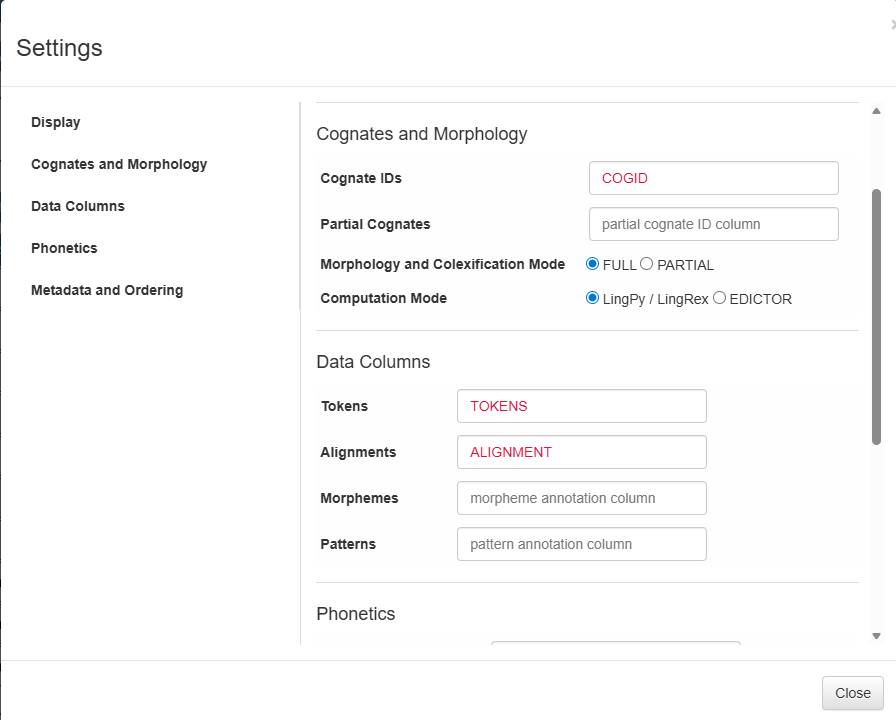

In LingPy, the methods which you can use to carry out these analyses have specific names, as well as the default output, a cluster decision represented as an integer identifier that assigns words to clusters. They are given in the table below:

Class | Alignments? | Sound Classes? | Sound Correspondences? | Threshold?| LingPy-Name | LingPy-Output | Note
--- | --- | --- | --- | --- | --- | --- | ---
CCM | no | yes | no | no | "turchin" | "turchinid" | Consonant-class matching method close to the description in [Turchin et al. (2010)](http://bibliography.lingpy.org?key=Turchin2010))
PSSP | yes | no | no | yes | "edit-dist" | "editid" | Vanilla edit-distance ([Levenshtein 1965](http://bibliography.lingpy.org?key=Levenshtein1965)), normalized by dividing with the longer string.
PSSP | yes | yes | no | yes | "sca" | "scaid" | Distance score derived from SCA alignments ([List 2012a](http://bibliography.lingpy.org?key=List2012b)) by applying [Downey et al.'s (2008)](http://bibliography.lingpy.org?key=Downey2008) formula
LSSP | yes | yes | yes | yes | "lexstat" | "lexstatid" | The core "LexStat" algorithm described in List ([2012b](http://bibliography.lingpy.org?key=List2012a) and [2014](http://bibliography.lingpy.org?key=List2014d))

As a general rule, you should keep the following in mind (see also our experience with these methods in [List, Greenhill, and Gray (2017)](http://bibliography.lingpy.org?key=List2017c):

1. if you want a fast first analysis and speed counts, take "turchin" (Dolgopolsky method), since it has a low amount of false positives, but it will also miss many cognates
2. if speed does not matter and you have enough concepts (> 100) in your data, and you want to have the most reliable analysis, take "lexstat"
3. if you have less than 100 concepts, and speed does not really matter, take "sca", as it yields consistently better results as the "turchin" method

## 4.3 Running the Analyses

In the following, we will run the users quickly to a test of all cognate detection algorithms and learn how to compare them. We start with the method called "turchin" in LingPy, and referred to as *consonant-class matching method* (CCM) above.

In [ ]:
lex = LexStat('east-polynesian.tsv', segments='tokens', check=True)

# run the dolgopolsky (turchin) analysis, which is threshold-free
lex.cluster(method='turchin', ref='turchinid')
lex.cluster(method="edit-dist", threshold=0.75, ref='editid')

# show the cognate sets, stored in "turchinid" for the words for "Eight"
eight = lex.get_dict(row='Eight') # get a dictionary with language as key for concept "eight"
for k, v in eight.items():
    idx = v[0] # index of the word, it gives us access to all data
    print("{0:20} \t {1} \t{2}\t {3}".format(lex[idx, 'doculect'], lex[idx, 'value'], 
                                             lex[idx, 'turchinid'],
                                            lex[idx, 'editid']))

In [ ]:
lexwen = LexStat('P_wenzhou-alignment-file.tsv', segments='tokens', check=True)

# run the dolgopolsky (turchin) analysis, which is threshold-free
lexwen.cluster(method='turchin', ref='turchinid')
lexwen.cluster(method="edit-dist", threshold=0.75, ref='editid')

# show the cognate sets, stored in "turchinid" for the words for "七"
seven = lexwen.get_dict(row='七') # get a dictionary with language as key for concept "七"
for k, v in seven.items():
    idx = v[0] # index of the word, it gives us access to all data
    print("{0:20} \t {1} \t{2}\t {3}".format(lexwen[idx, 'doculect'], lexwen[idx, 'IPA'], 
                                             lexwen[idx, 'turchinid'],
                                            lexwen[idx, 'editid']))

We now do the same for the "sca" method, but since this method is not threshold free, we will need to define a threshold. We follow the default value we know from experience, which is 0.45. We then print out the same data, but this time including the cognate judgments by all three methods:

In [ ]:
lex.cluster(method="sca", threshold=0.45, ref='scaid')

for k, v in eight.items():
    idx = v[0] 
    print("{0:20} \t {1} \t{2} \t {3} ".format(
        lex[idx, 'doculect'], 
        lex[idx, 'value'], 
        lex[idx, 'turchinid'], 
        lex[idx, 'scaid']))

We are now ready to do the same analysis with the "lexstat" method. This will take some time due to the permutation test. In order to make sure we do not need to run this all the time, we will save the data immediately after running the permutation to a file which we give the extension "bin.tsv", and which we can load in case we want to carry out further tests, or which we can otherwise also share when publishing results, as it contains all the data needed to rerun the analyses on a different machine. LingPy creates a lot of data when analyzing wordlists, but by default, only a minimal amount of the data is written to file. In this case, if we want to store the results of the permutation test, we need to store the whole file with all the data that lingpy produces, especially the language-specific scoring function. In order to force LingPy to do so, we have to add the keyword ```ignore=[]``` to the output-function. This will prevent that any data which should be written to file is ignored:

In [ ]:
lex.get_scorer(runs=10000)
lex.output('tsv', filename='east-polynesian.bin', ignore=[])
lex.cluster(method='lexstat', threshold=0.60, ref='lexstatid')

for k, v in eight.items():
    idx = v[0] 
    print("{0:20} \t {1} \t{2} \t {3} \t {4}".format(
        lex[idx, 'doculect'], 
        lex[idx, 'value'], 
        lex[idx, 'turchinid'], 
        lex[idx, 'scaid'],
        lex[idx, 'lexstatid']
    ))

计算温州方言相似度

In [ ]:
lexwen.get_scorer(runs=10000)
lexwen.output('tsv', filename='wenzhou.bin', ignore=[])
lexwen.cluster(method='lexstat', threshold=0.60, ref='lexstatid')

for k, v in seven.items():
    idx = v[0] 
    print("{0:20} \t {1} \t{2} \t {3} \t {4}".format(
        lexwen[idx, 'doculect'], 
        lexwen[idx, 'IPA'], 
        lexwen[idx, 'turchinid'], 
        lexwen[idx, 'scaid'],
        lexwen[idx, 'lexstatid']
    ))

You can see that there is not much difference in the results for this very item, but you should not underestimate the different power of the methods, as we will see later on when running an evaluation analysis. For now, trust me that in general the results are quite different.

Let us now run (for those who managed to install the python-igraph package) an additional analysis which was shown to yield even better results. Here, we do still use the "lexstat" approach, but we use "infomap" ([Rosvall and Bergstroem 2008](http://bibliography.lingpy.org?key=Rosvall2008)) as our cluster method. This method is network-based rather than agglomerative (as is LingPy's default), and was shown to yield consistently better results in combination with "lexstat" ([List, Greenhill, and Gray 2017](http://bibliography.lingpy.org?key=List2017c)). In order to avoid that we override the content of the column "lexstatid", we now pass a specific keyword, called `ref` (the "reference" of the output) and set its value to "infomap". We also choose a different threshold, the one we empirically determined from tests on different language families (see ibd. for details):

In [ ]:
lex.cluster(method="lexstat", threshold=0.55, ref="infomap", cluster_method='infomap')
for k, v in eight.items():
    idx = v[0] 
    print("{0:20} \t {1} \t{2} \t {3} \t {4} \t {5}".format(
        lex[idx, 'doculect'], 
        lex[idx, 'value'], 
        lex[idx, 'turchinid'], 
        lex[idx, 'scaid'],
        lex[idx, 'lexstatid'],
        lex[idx, 'infomap']
    ))

用informap计算温州方言

In [ ]:
lexwen.cluster(method="lexstat", threshold=0.55, ref="infomap", cluster_method='infomap')
for k, v in seven.items():
    idx = v[0] 
    print("{0:20} \t {1} \t{2} \t {3} \t {4} \t {5}".format(
        lexwen[idx, 'doculect'], 
        lexwen[idx, 'IPA'], 
        lexwen[idx, 'turchinid'], 
        lexwen[idx, 'scaid'],
        lexwen[idx, 'lexstatid'],
        lexwen[idx, 'infomap']
    ))

Well, no improvement for "eight", but we will see later in detail, and for now, we just write the data to file, this time in plain text, without the additional information, but with the additional columns with our analyses.

In [ ]:
lex.output('tsv', filename='east-polynesian-lexstat')

2024-07-10 02:17:46,092 [INFO] Data has been written to file <east-polynesian-lexstat.tsv>.


In [ ]:
lexwen.output('tsv', filename='wenzhou-lexstat')

2024-07-10 02:33:21,548 [INFO] Data has been written to file <wenzhou-lexstat.tsv>.


### 4.4 Aligning the Results

One great advantage of LingPy is that alignments can also be directly computed from automatically inferred cognate sets. This is useful, first also for manually annotated cognate sets, as it saves a lot of work, since alignment algorithms come very close to human judgments, and it requires only minimal post-annotation by humans to correct the errors. Second, it is useful to check the data, as it makes transparent where the algorithm found the similarity that triggered a respective cognate decision.

When carrying out alignment analyses, we use the `Alignments` class in LingPy which requires a word list as input as well as the column which contains the cognate sets which shall be aligned. We will use the "infomap" analysis for our automatic alignments, since this usually performs better than the other methods. This is done by specifying the keyword `ref` as "infomap" when calling the `Alignments` class. As a further important tweak, we first load the data into the `LexStat` class so that we have the inferred sound correspondences which will then be used to compute our alignments. For this purpose, we load the file `east-polynesian.bin.tsv` which stores the results of our permutation analysis and provides language-specific scores for all segments in the data (high scores indicating likely sound correspondences, low scores < 0 indicating non-corresponding sounds). We align using the normal progressive alignment, which is usually sufficient for smaller alignments and is slightly faster. When calling the alignment algorithm, we define the specific keyword `scoredict` and pass it the `lex.cscorer`, which stores the language-specific scoring functions for our data:

In [ ]:
lex = LexStat('east-polynesian.bin.tsv')
alm = Alignments('east-polynesian-lexstat.tsv', ref='infomap', segments='tokens') # `ref` indicates the column with the cognate sets
alm.align(method='progressive', scoredict=lex.cscorer)

In [ ]:
lexwen = LexStat('wenzhou.bin.tsv')
almwen = Alignments('wenzhou-lexstat.tsv', ref='infomap', segments='tokens') # `ref` indicates the column with the cognate sets
almwen.align(method='progressive', scoredict=lexwen.cscorer)

This was not very spectacular, as we have not yet seen what happened. We can visualize the alignments from the command line by picking a particular cognate set and printing the alignments on screen. The alignments are added in a specific column called `alignments` as a default (but which can be modified by specifying another value with the keyword `alignments` passed to the initialization method for the `Alignments` class). Additionally, they can be retrieved using the `Alignments.get_msa` method - since multiple different alignment analyses can be stored in the object, the reference to a particular analysis must be passed. The following code illustrates how we can print a particular aligned cognate set:

In [ ]:
msa = alm.get_msa('infomap')[1]
for i, idx in enumerate(msa['ID']):
    print(
        '{0:20}'.format(msa['taxa'][i]),  
        '\t',
        alm[idx, 'concept'],
        '\t',
        '\t'.join(msa['alignment'][i])
    )

Hawaiian             	 Eight 	 w	a	l	u
Mangareva            	 Eight 	 v	a	r	u
Maori                	 Eight 	 w	a	r	u
North_Marquesan      	 Eight 	 v	a	ʔ	u
Rapanui              	 Eight 	 v	a	ʔ	u
Ra’ivavae            	 Eight 	 v	a	ɢ	u
Rurutuan             	 Eight 	 v	a	ʔ	u
Sikaiana             	 Eight 	 v	a	l	u
Tahitian             	 Eight 	 v	a	ʔ	u
Tuamotuan            	 Eight 	 v	a	r	u


In [ ]:
msawen = almwen.get_msa('infomap')[1]
for i, idx in enumerate(msawen['ID']):
    print(
        '{0:20}'.format(msawen['taxa'][i]),  
        '\t',
        almwen[idx, 'concept'],
        '\t',
        '\t'.join(msawen['alignment'][i])
    )

乐清                   	 一 	 -	i	ɤ	-	-
平阳                   	 一 	 -	i	ᴀ	-	-
文成                   	 一 	 -	i	a	-	-
永嘉                   	 一 	 -	i	a	-	i
永嘉                   	 一 	 -	-	i	-	-
泰顺仕阳                 	 一 	 ɕ	i	ɪ	ʔ	-
泰顺仕阳                 	 一 	 -	i	ɪ	ʔ	-
泰顺罗阳                 	 一 	 -	i	ɛ	ʔ	-
洞头区                  	 一 	 -	i	e	-	-
灵溪沪山                 	 一 	 -	-	e	-	-
灵溪沪山                 	 一 	 -	i	ɛ	-	-
灵溪顺昌                 	 一 	 -	i	e	-	-
瑞安                   	 一 	 -	-	e	-	-
瑞安                   	 一 	 -	i	a	-	-
鹿城                   	 一 	 -	i	a	-	i


Again the eight, although this was not planned. But now let's quickly save the data to file, so that we can go on and inspect the findings further:

In [ ]:
alm.output('tsv', filename='east-polynesian-aligned', ignore='all', prettify=False)

2024-07-10 02:22:53,326 [INFO] Data has been written to file <east-polynesian-aligned.tsv>.


In [ ]:
almwen.output('tsv', filename='wenzhou-aligned', ignore='all', prettify=False)

2024-07-10 02:47:01,867 [INFO] Data has been written to file <wenzhou-aligned.tsv>.


### 4.5 Inspecting Alignments with the EDICTOR

The easiest way to inspect your alignments is to load them into the EDICTOR tool ([List 2017](http://bibliography.lingpy.org?key=List2017d)). In order to do so, just take the file ```east-polynesian-aligned.tsv```, open the EDICTOR at [http://edictor.digling.org](http://edictor.digling.org) and drag the file into the BROWSE button (or press the button and select the file). A red field will pop up and after pressing it, you can inspect your data in the EDICTOR.

To lookup an alignment, just right-click in the field COGID for any numeric entry. If the cognate set is consisting of more than one word form, a popup window will appear in which you can inspect and manually edit the alignments.

![alms](img/alms.png)

### 4.6 Sound Correspondences

EDICTOR offers a new module in which you can inspect the sound correspondence patterns of your data. To search those, just load your file into the EDICTOR tool, and click on ANALYZE->CORRESPONDENCE PATTERNS. If you then click the OK button, you will see the correspondence patterns for the aligned East Polynesian data.

![correspondence patterns](img/corrs.png)

### 5 Evaluation with LingPy

#### 5.1 Manual Inspection of Differences

If you want to manually inspect the differences after having computed automatic cognates, you can write data in LingPy to a textfile which easily contrasts the differences between experts' cognate judgments and automatic cognates.

In [ ]:
from lingpy.evaluate.acd import diff
wl = Wordlist('east-polynesian-lexstat.tsv')
out = diff(wl, 'cogid', 'infomap', tofile=True, filename="east-polynesian", pprint=False)
out

2024-07-10 02:57:46,401 [INFO] Data has been written to file <east-polynesian.diff>.


((0.9433366501871404, 0.9227073959393681, 0.9329079941013704),
 (0.9101783453370696, 0.8872332528489478, 0.8985593448056826))

If you inspect the file ```east-polynesian.diff```, you will see the following output:

```text
Concept: above, False Positives: no, False Negatives: yes
Hawaiian       	iluna	   1	   1
Mangareva      	ruŋa 	   1	   1
Maori          	iruŋa	   1	   1
North_Marquesan	ʔuna 	   1	   1
Rapanui        	ruga 	   1	   1
Ra’ivavae      	ɢuʔa 	   1	   1
Tuamotuan      	ruŋa 	   1	   1
Rurutuan       	nuʔa 	   1	   7
Tahitian       	niʔa 	   1	   7
#
Concept: all, False Positives: yes, False Negatives: no
Hawaiian       	apau      	   1	   1
Mangareva      	kouroa    	   2	   2
Maori          	katoa     	   3	   3
Ra’ivavae      	ʔatoʔa    	   3	   3
Rurutuan       	paːʔaːtoʔa	   3	   3
Sikaiana       	katoa     	   3	   3
Tahitian       	atoʔa     	   3	   3
Tuamotuan      	katoŋa    	   3	   3
North_Marquesan	tiatohu   	   4	   3
Rapanui        	tahi      	   5	   5
#
```

This output shows you the expert cognate judgment in the first column, and the algorithmic judgments in the second colummn. Differences are easy to spot, as we follow consecutive numerical ordering, so if two numbers are not the same, it means the algorithm differs. 

#### 5.2 Computing B-Cubed Scores

LingPy has a couple of evaluation methods implemented, and since we have original expert cognate judgments from ABVD, we can compare our findings against theirs. Comparing cognate set accuracy is not necessarily a trivial problem, as we deal with cluster comparisons, which is a topic that was debated a lot in circles outside of linguistics, and it would lead us too far away if we discussed it in detail here now. For a linguistic viewpoint with a brief working example of our preferred method, the B-Cubed scores (see [Hauer and Kondrak 2011](http://bibliography.lingpy.org?key=Hauer2011), [Bagga and Baldwin 1998](http://bibliography.lingpy.org?key=Bagga1998), and [Amigo et al. 2009](http://bibliography.lingpy.org?key=Amigo2009)), see List, Greenhill, and Gray (2017). What you need to know, however, is that evaluation in NLP circles usually comes along with the concepts of *precision*, *recall*, and *f-score*. Initially, I found them rather difficult to grasp, as historical linguists usually think in terms of false positives and false negatives. In order to understand the idea, one should think that an algorithm for cognate detection can basically do two things either right or wrong: it could cluster words which are not cognate, or it could fail to cluster words as cognate. In the first case, we would measure this in terms of precision, by counting, how often the algorithm proposes correct or incorrect answers, and in the latter case, we measure the proportion of cognate sets which are missed. In the B-Cubed measure we use, this translates roughly to a measure of false/true positives vs. false/true negatives, but it is not entirely the same. The f-score computes the harmonic mean, which summarizes both values, and we usually want to improve the f-score and we use it to compare different algorithms with each other. 

Let's start and do this comparison now, by loading the respective functions from the LingPy evaluation module, and computing precision, recall, and f-scores for all our different automatically inferred cognate sets with respect to the gold standard. The gold standard is located in the column `COGID` of the input file, so we need to name this when comparing with any of the other columns (like `LEXSTATID`, etc.).

In [ ]:
from lingpy.evaluate.acd import bcubes
from lingpy import *
wl = Wordlist('east-polynesian-lexstat.tsv')

for res in ['turchinid', 'editid', 'scaid', 'lexstatid', 'infomap']:
    print('{0:10}\t{1[0]:.4f}\t{1[1]:.4f}\t{1[2]:.4f}'.format(
        res,
        bcubes(wl, 'cogid', res, pprint=False)
    ))

You can see, that the "infomap" method is, in fact, working slightly better than the normal "lexstat" method, and you can also see how deep the difference between the correspondence-informed methods and the other methods is.

## 6 Exporting Data

It is clear that for many of those who consult automatic cognate detection, they use the methods in order to be able to do more with the data afterwards. LingPy so far supports quite a few different ways to write your data to file for further use in other software packages. A complete integration of `Nexus` files which transport all information which might be relevant for BEAST, however, does not exist yet (but will be added at some point sooner than later).

### 6.1 Nexus-Export

Nexus export is straightforward in LingPy, and currently, two formats, MrBayes and BEAST are supported. The following code will export our latest wordlist to Nexus in MrBayes format, using the expert cognate judgments for export:

In [ ]:
from lingpy.convert.strings import write_nexus
nexus = write_nexus(wl, ref='cogid', mode='mrbayes', filename='east-polynesian-mb.nex')

If you want to export the automatic cognate judgments to BEAST nexus format, you can do so by changing the "mode" keyword and the "ref" keyword:

In [ ]:
nexus = write_nexus(wl, ref="lexstatid", mode="beast", filename='east-polynesian-beast.nex')

Finally, if you want BEAST to use concept-specific rates instead of general rates for all data, you can do so selecting "beastwords" as your mode of choice:

In [ ]:
nexus = write_nexus(wl, ref="lexstatid", mode="beastwords", filename="east-polynesian-beastw.nex")

### 6.2 Distances and Trees

You can also calculate distances which would be interesting for packages like SplitsTree (Huson 1998), or also Phylip ([Felsenstein 2005](http://bibliography.lingpy.org?key=Felsenstein2005). For this, you need to be careful, however, since distances can be computed in different ways, and you can choose from a multitude of different distances, and they are not (yet) all documented. The distance calculation as a default counts, how many cognates there are for all concepts between each language pair, so in some way, this tries to mimick Swadesh's original idea of distances or similarities between languages:

### 距离方法（method）说明

- edit-dist：基于 Levenshtein/LDN（归一化编辑距离）。对词形逐字符比较，默认不考虑语音学加权。
- turchin：Turchin 距离，常用于粗略比较同源关系的首段截断编码，对小数据集很快。
- sca：SCA（Sound-Class-Based Alignment）基于语音类别的比对距离，考虑音类映射与对齐成本。
- lexstat：LexStat 距离，基于音类与统计权重的相似度估计，更适合自动化同源比较。

***Smith–Waterman 与全局比对***

- Smith–Waterman 是局部对齐算法，适合找出局部相似片段；在 edictor 中相当于 mode=local。
- 全局对齐对应 mode=global（需要全词对齐）；mode=overlap 允许部分重叠；mode=dialign 为对齐兼容性模式。

***树算法（tree）说明***

- Neighbor-Joining：neighbor，适合构建非超度量树（允许不同演化速率）。
- UPGMA：upgma，假设超度量（分子钟）条件，输出等距树。

***Newick 输出***

- 结果中的 tree 字段为 Newick 格式字符串，可直接导入 FigTree、iTOL 等可视化工具。
- 为避免括号/逗号等符号影响解析，税名若含特殊字符会被安全化（并提供映射 taxa_map）。

In [5]:
from lingpy.compare.lexstat import LexStat
from lingpy.algorithm.clustering import neighbor, upgma
from lingpy import Tree

lex = LexStat(r'C:\Users\sheng\OneDrive\文档\论文\LingPy\lingpy-tutorial\east-polynesian-lexstat.tsv')

# 1) 计算不同距离方法的距离矩阵
import numpy as np
for method in ['edit-dist', 'turchin', 'sca', 'lexstat']:
    D = np.asarray(lex.get_distances(method=method, mode='overlap'))
    print(method, D.shape)


# 2) 基于距离矩阵构建 Neighbor-Joining / UPGMA 树
D_edit = lex.get_distances(method='edit-dist', mode='overlap')
nwk_nj = neighbor(D_edit, lex.taxa)
nwk_upgma = upgma(D_edit, lex.taxa)

print(Tree(nwk_nj).asciiArt())
print(Tree(nwk_upgma).asciiArt())

# 3) 保存 Newick
with open('east-polynesian-editdist-nj.nwk', 'w', encoding='utf8') as f:
    f.write(nwk_nj)


edit-dist (10, 10)


KeyError: 'turchin'

In [ ]:
import io
from lingpy.convert.strings import matrix2dst

dst = matrix2dst(wl.get_distances(ref='infomap', mode='swadesh'), wl.taxa)
with io.open('east-polynesian.dst', 'w', encoding='utf8') as fp:
    fp.write(dst)
print(dst)

2024-07-10 02:58:05,438 [INFO] Successfully calculated dst.


 10
Hawaiian   0.0000 0.3448 0.3905 0.3188 0.3873 0.4792 0.3810 0.4948 0.4450 0.3015
Mangareva  0.3448 0.0000 0.3498 0.2800 0.3467 0.4497 0.3941 0.4211 0.4356 0.2769
Maori      0.3905 0.3498 0.0000 0.3527 0.4020 0.4948 0.4190 0.4433 0.4593 0.3166
North_Marqu 0.3188 0.2800 0.3527 0.0000 0.3812 0.4762 0.4203 0.4010 0.4541 0.2893
Rapanui    0.3873 0.3467 0.4020 0.3812 0.0000 0.4947 0.4559 0.4241 0.4608 0.3316
Ra’ivavae  0.4792 0.4497 0.4948 0.4762 0.4947 0.0000 0.2448 0.6313 0.2199 0.4565
Rurutuan   0.3810 0.3941 0.4190 0.4203 0.4559 0.2448 0.0000 0.5619 0.1340 0.3467
Sikaiana   0.4948 0.4211 0.4433 0.4010 0.4241 0.6313 0.5619 0.0000 0.5928 0.3690
Tahitian   0.4450 0.4356 0.4593 0.4541 0.4608 0.2199 0.1340 0.5928 0.0000 0.3869
Tuamotuan  0.3015 0.2769 0.3166 0.2893 0.3316 0.4565 0.3467 0.3690 0.3869 0.0000



In [ ]:
import io
from lingpy.convert.strings import matrix2dst
wlwen = Wordlist('wenzhou-lexstat.tsv')
dst = matrix2dst(wlwen.get_distances(ref='infomap', mode='swadesh'), wlwen.taxa)
with io.open('wenzhou.dst', 'w', encoding='utf8') as fp:
    fp.write(dst)
print(dst)

2024-07-10 03:08:14,472 [INFO] Successfully calculated dst.


 11
乐清         0.0000 0.0253 0.0316 0.0547 0.1434 0.0570 0.2445 0.0558 0.2497 0.0679 0.0836
平阳         0.0253 0.0000 0.0299 0.0375 0.1553 0.0688 0.2474 0.0508 0.2523 0.0540 0.0769
文成         0.0316 0.0299 0.0000 0.0541 0.1480 0.0669 0.2453 0.0583 0.2482 0.0654 0.0845
永嘉         0.0547 0.0375 0.0541 0.0000 0.1623 0.0798 0.2442 0.0540 0.2479 0.0640 0.0577
泰顺仕阳       0.1434 0.1553 0.1480 0.1623 0.0000 0.1459 0.1977 0.1587 0.2023 0.1653 0.1726
泰顺罗阳       0.0570 0.0688 0.0669 0.0798 0.1459 0.0000 0.2395 0.0564 0.2461 0.0920 0.1109
洞头区        0.2445 0.2474 0.2453 0.2442 0.1977 0.2395 0.0000 0.2230 0.0243 0.2597 0.2463
灵溪沪山       0.0558 0.0508 0.0583 0.0540 0.1587 0.0564 0.2230 0.0000 0.2263 0.0763 0.0904
灵溪顺昌       0.2497 0.2523 0.2482 0.2479 0.2023 0.2461 0.0243 0.2263 0.0000 0.2646 0.2516
瑞安         0.0679 0.0540 0.0654 0.0640 0.1653 0.0920 0.2597 0.0763 0.2646 0.0000 0.0486
鹿城         0.0836 0.0769 0.0845 0.0577 0.1726 0.1109 0.2463 0.0904 0.2516 0.0486 0.0000



This format follows strictly the Phylip distance format which also cuts off all language names longer than 10 characters (but there are ways to modify this, I can't show them now).


As a final experiment, let us create a tree from the distances, using the simple Neighbor-Joining algorithm, and then print this tree to screen.

In [ ]:
tree = Tree(wl.get_tree(ref='infomap', tree_calc='upgma', force=True))
print(tree.asciiArt())



2024-07-10 02:58:23,628 [INFO] Successfully calculated tree.


                    /-Ra’ivavae
          /edge.1--|
         |         |          /-Rurutuan
         |          \edge.0--|
-root----|                    \-Tahitian
         |
         |          /-Sikaiana
          \edge.7--|
                   |          /-Rapanui
                    \edge.6--|
                             |          /-Maori
                              \edge.5--|
                                       |          /-Hawaiian
                                        \edge.4--|
                                                 |          /-North_Marquesan
                                                  \edge.3--|
                                                           |          /-Mangareva
                                                            \edge.2--|
                                                                      \-Tuamotuan


In [ ]:
tree = Tree(wlwen.get_tree(ref='infomap', tree_calc='upgma', force=True))
print(tree.asciiArt())



2024-07-10 03:08:37,129 [INFO] Successfully calculated tree.


                    /-洞头区
          /edge.0--|
         |          \-灵溪顺昌
-root----|
         |          /-泰顺仕阳
         |         |
          \edge.8--|                    /-瑞安
                   |          /edge.1--|
                   |         |          \-鹿城
                    \edge.7--|
                             |          /-泰顺罗阳
                              \edge.6--|
                                       |          /-灵溪沪山
                                        \edge.5--|
                                                 |          /-永嘉
                                                  \edge.4--|
                                                           |          /-文成
                                                            \edge.3--|
                                                                     |          /-乐清
                                                                      \edge.2--|
                                                                       

It is not up to me to judge how good this tree is, and it may also be wrongly rooted in the display. But you can see that LingPy can also handle classical tree formats. Although we do not plan to make LingPy a concurrence for tree inference packages, we find it useful to offer Neighbor-joining and UPGMA just to make it easier for users to quickly evaluate their analyses.






### 6.3 CLDF Export

The Cross-Linguistic Data Formats initiative ([Forkel et al. 2017](http://bibliography.lingpy.org?key=Forkel2017a)) provides standardized formats for the sharing of data amenable for cross-linguistic comparison. LingPy now also offers the possibility to export to CLDF as well as to read CLDF files. Since CLDF is more explicit and powerful than LingPy's file-formats, you can add additional data, like your sources in form of BibTex files. We have prepared a BibTex file along with this tutorial and pass it to the algorithm, so that it becomes included into the CLDF-package:

In [ ]:
from lingpy.convert.cldf import to_cldf
from lingpy.basic.wordlist import from_cldf
to_cldf(wl, path='cldf', source_path='polynesian.bib', source='source', form='form')

Once the data has been exported, you can easily import it back, using the ```from_cldf``` function. Just make sure to specify the metadata file in JSON format as the path:

In [ ]:
wl = from_cldf("cldf/Wordlist-metadata.json")
print(wl.height, wl.width)

## References

<ul>
<li>Amigó, E., J. Gonzalo, J. Artiles, and F. Verdejo (2009): <strong>A comparison of extrinsic clustering evaluation metrics based on formal constraints</strong>. <em>Information Retrieval</em> 12.4. 461-486. </li>
<li>Bagga, A. and B. Baldwin (1998): <strong>Entity-based cross-document coreferencing using the vector space model</strong>. In: <strong>Proceedings of the 36th Annual Meeting of the Association for Computational Linguistics and 17th International Conference on Computational Linguistics</strong>. Association of Computational Linguistics 79-85.</li>
<li>Bouckaert, R., J. Heled, D. Kühnert, T. Vaughan, C.-H. Wu, D. Xie, M. Suchard, A. Rambaut, and A. Drummond (2014): <strong>BEAST 2: A Software Platform for Bayesian Evolutionary Analysis</strong>. <em>PLoS Computational Biology</em> 10.4. e1003537. </li>
<li>Brown, C., E. Holman, and S. Wichmann (2013): <strong>Sound correspondences in the world’s languages</strong>. <em>Language</em> 89.1. 4-29. </li>
<li>Cs\’ardi, G. and T. Nepusz (2006): <strong>The igraph software package for complex network research</strong>. <em>InterJournal. Complex Systems</em> .1695. . </li>
<li>Dolgopolsky, A. (1964): <strong>Gipoteza drevnejšego rodstva jazykovych semej Severnoj Evrazii s verojatnostej točky zrenija</strong> [A probabilistic hypothesis concering the oldest relationships among the language families of Northern Eurasia]. <em>Voprosy Jazykoznanija</em> 2. 53-63. </li>
<li>Downey, S., B. Hallmark, M. Cox, P. Norquest, and S. Lansing (2008): <strong>Computational feature-sensitive reconstruction of language relationships: developing the ALINE distance for comparative historical linguistic reconstruction</strong>. <em>Journal of Quantitative Linguistics</em> 15.4. 340-369. </li>
<li>Felsenstein, J. (2005): <strong>PHYLIP (Phylogeny Inference Package)</strong>. </li>
<li>Forkel, R., S. Greenhill, and J.-M. List (2017): <strong>Cross-Linguistic Data Formats (CLDF)</strong>. Max Planck Institute for the Science of Human History: Jena.</li>
<li>Greenhill, S., R. Blust, and R. Gray (2008): <strong>The Austronesian Basic Vocabulary Database: From bioinformatics to lexomics</strong>. <em>Evolutionary Bioinformatics</em> 4. 271-283. </li>
<li>Hammarström, H., R. Forkel, and M. Haspelmath (2017): <strong>Glottolog</strong>. Max Planck Institute for Evolutionary Anthropology: Leipzig. </li>
<li>Hauer, B. and G. Kondrak (2011): <strong>Clustering semantically equivalent words into cognate sets in multilingual lists</strong>. In: <strong>Proceedings of the 5th International Joint Conference on Natural Language Processing</strong>. AFNLP 865-873.</li>
<li>Huson, D. (1998): <strong>SplitsTree: analyzing and visualizing evolutionary data</strong>. <em>Bioinformatics</em> 14.1. 68-73. </li>
<li>Levenshtein, V. (1965): <strong>Dvoičnye kody s ispravleniem vypadenij, vstavok i zameščenij simvolov</strong> [Binary codes with correction of deletions, insertions and replacements]. <em>Doklady Akademij Nauk SSSR</em> 163.4. 845-848. </li>
<li>List, J.-M. (2012): <strong>SCA. Phonetic alignment based on sound classes</strong>. In: Slavkovik, M. and D. Lassiter (eds.): <strong>New directions in logic, language, and computation</strong>. Springer: Berlin and Heidelberg. 32-51.</li>
<li>List, J.-M. (2012): <strong>LexStat. Automatic detection of cognates in multilingual wordlists</strong>. In: <strong>Proceedings of the EACL 2012 Joint Workshop of Visualization of Linguistic Patterns and Uncovering Language History from Multilingual Resources</strong>. 117-125.</li>
<li>List, J.-M. (2014): <strong>Investigating the impact of sample size on cognate detection</strong>. <em>Journal of Language Relationship</em> 11. 91-101. </li>
<li>List, J.-M. (2014): <strong>Sequence comparison in historical linguistics</strong>. Düsseldorf University Press: Düsseldorf.</li>
<li>List, J.-M., M. Cysouw, and R. Forkel (2016): <strong>Concepticon. A resource for the linking of concept lists</strong>. In: <strong>Proceedings of the Tenth International Conference on Language Resources and Evaluation</strong>. 2393-2400.</li>
<li>List, J.-M., P. Lopez, and E. Bapteste (2016): <strong>Using sequence similarity networks to identify partial cognates in multilingual wordlists</strong>. In: <strong>Proceedings of the Association of Computational Linguistics 2016 (Volume 2: Short Papers)</strong>. Association of Computational Linguistics 599-605.</li>
<li>List, J.-M. (2017): <strong>Introduction to computer-assisted language comparison</strong> [Einführung in den computergestützten Sprachvergleich]. Institute of Linguistics: Nankai University (Tianjin, China).</li>
<li>List, J.-M., S. Greenhill, and R. Gray (2017): <strong>The potential of automatic word comparison for historical linguistics</strong>. <em>PLOS ONE</em> 12.1. 1-18. </li>
<li>List, J.-M. (2017): <strong>A web-based interactive tool for creating, inspecting, editing, and publishing etymological datasets</strong>. In: <strong>Proceedings of the 15th Conference of the European Chapter of the Association for Computational Linguistics. System Demonstrations</strong>. 9-12.</li>
<li>List, J.-M. and R. Forkel (2017): <strong>LingPy. A Python library for historical linguistics</strong>. Max Planck Institute for the Science of Human History: Jena. </li>
<li>Moran, S. and M. Cysouw (2017): <strong>The Unicode Cookbook for Linguists: Managing
writing systems using orthography profiles</strong>. Zenodo: Zürich.</li>
<li>Notredame, C., D. Higgins, and J. Heringa (2000): <strong>T-Coffee</strong><strong>. A novel method for fast and accurate multiple sequence alignment</strong>. <em>Journal of Molecular Biology</em> 302. 205-217. </li>
<li>Rosvall, M. and C. Bergstrom (2008): <strong>Maps of random walks on complex networks reveal community structure</strong>. <em>Proceedings of the National Academy of Sciences</em> 105.4. 1118-1123. </li>
<li>Saitou, N. and M. Nei (1987): <strong>The neighbor-joining method: A new method for reconstructing phylogenetic trees</strong>. <em>Molecular Biology and Evolution</em> 4.4. 406-425. </li>
<li>Sokal, R. and C. Michener (1958): <strong>A statistical method for evaluating systematic relationships</strong>. <em>University of Kansas Scientific Bulletin</em> 28. 1409-1438. </li>
<li>Turchin, P., I. Peiros, and M. Gell-Mann (2010): <strong>Analyzing genetic connections between languages by matching consonant classes</strong>. <em>Journal of Language Relationship</em> 3. 117-126. </li>
</ul>


In [1]:
import numpy as np

# 为了可重复：固定随机种子
rng = np.random.default_rng(42)

# 1. 定义一句“永嘉县志风格”的句子和 token
tokens = ["永嘉县", "旧属", "温州府", "东濒", "东海", "西接", "青田"]
n_tokens = len(tokens)

# 2. 假设每个 token 已经有一个 d_model 维的 embedding
d_model = 8   # 向量维度（这里只是示范，实际可能 512 / 768 / 1024 等）
X = rng.normal(size=(n_tokens, d_model))  # (n_tokens, d_model)

# 3. 随机初始化 Q, K, V 的线性变换矩阵
#   实际中这些是可训练参数，这里只是教学用随机矩阵
d_k = d_model
d_v = d_model

W_Q = rng.normal(size=(d_model, d_k))
W_K = rng.normal(size=(d_model, d_k))
W_V = rng.normal(size=(d_model, d_v))

# 4. 计算 Q, K, V 矩阵
#   Q, K, V 形状都是 (n_tokens, d_*)
Q = X @ W_Q   # Query
K = X @ W_K   # Key
V = X @ W_V   # Value

# 5. 定义一个 softmax 函数（对最后一维做归一化）
def softmax(x, axis=-1):
    x = x - np.max(x, axis=axis, keepdims=True)  # 防止数值溢出
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

# 6. 选定一个关注的 token：这里选“东濒”，下标 3
idx = 3  # "东濒"

q = Q[idx:idx+1]         # 形状 (1, d_k)，只取这一行
scores = q @ K.T         # 形状 (1, n_tokens)，分别与每个 K 做点积
scores_scaled = scores / np.sqrt(d_k)  # 除以 sqrt(d_k)

# 7. 对 scores 做 softmax，得到对每个 token 的注意力权重
attn_weights = softmax(scores_scaled, axis=-1)  # (1, n_tokens)

# 8. 用注意力权重对所有 V 做加权求和，得到“东濒”的新表示
output_vector = attn_weights @ V  # 形状 (1, d_v)

# 9. 打印结果，便于教学展示
print("句子 tokens：", tokens)
print("\n当前 Query token：", tokens[idx])
print("\n注意力权重（对每个 token 的关注度）：")
for t, w in zip(tokens, attn_weights[0]):
    print(f"  {t:4s}  ->  {w:.4f}")

print("\n输出向量 output_vector 的形状：", output_vector.shape)
print("（这是“东濒”在 self-attention 后的新表征向量）")


句子 tokens： ['永嘉县', '旧属', '温州府', '东濒', '东海', '西接', '青田']

当前 Query token： 东濒

注意力权重（对每个 token 的关注度）：
  永嘉县   ->  0.0004
  旧属    ->  0.0981
  温州府   ->  0.0014
  东濒    ->  0.3447
  东海    ->  0.0002
  西接    ->  0.5384
  青田    ->  0.0168

输出向量 output_vector 的形状： (1, 8)
（这是“东濒”在 self-attention 后的新表征向量）


In [2]:
#python - <<'PY'
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "no cuda")
#PY


2.5.1+cu121
True
NVIDIA GeForce RTX 4060 Ti


In [ ]:
import re
import unicodedata
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from docx import Document

# —— 如果 lingpy 导入慢，第一次运行会编译模型；耐心等它跑完一次即可 ——
from lingpy.sequence.sound_classes import ipa2tokens, tokens2class
from lingpy.align.pairwise import sw_align


# =======================
# 1) 文件路径（按需修改）
# =======================
XLSX_PATH = "C:\Users\sheng\OneDrive\潘悟云\同源词\南亚语.xlsx"
TEMPLATE_DOCX = "C:\Users\sheng\OneDrive\潘悟云\同源词\南岛_头首元颅_同源词_SW_DBSCAN_输出.docx"   # 用来参考风格（本脚本不强依赖它的内容）
OUT_DOCX = "南亚语的牙齿_SW_DBSCAN_输出.docx"


# =======================
# 2) 列名（按你的 xlsx）
# =======================
COL_FORM = "词"
COL_LANG = "语言点"
COL_GLOSS = "英义"   # 英文释义那列


# =======================
# 3) 语义筛选规则
# =======================
# —— 你的目标：头/首/元/颅（含首端/源头/头颅/颅骨）
INCLUDE_PATTERNS = [
    r"\bhead\b",
    r"\bskull\b",
    r"\bcranium\b",
    r"\bhead[- ]?end\b",
    r"\bheadwaters?\b",
    r"\bsource\b",
    r"\borigin\b",
    r"\bbeginning\b",
    r"\bfirst\b",
    r"\bchief\b",
    r"\bleader\b",
    r"\btop\b",
    r"\bsummit\b",
    r"\bpeak\b",
    r"\bend\b",
    r"\btip\b",
    r"\bextremity\b",
    r"\bcrown\b",
]
INCLUDE_RE = re.compile("|".join(INCLUDE_PATTERNS), re.I)

# —— 显式排除：芋头、唱一首歌、元素、元音，以及你前面提到的“舌头”类后缀头/非本义
EXCLUDE_PATTERNS = [
    r"\btaro\b",          # 芋头
    r"\bsong\b",          # 一首歌
    r"\belement\b",       # 元素
    r"\bvowel\b",         # 元音
    r"\btongue\b",        # 舌头（后缀头，不算 head/首）
    r"\bhead louse\b",    # 头虱
    r"\bhair\b",          # 头发（若你要单独做 hair，可从这里移除）
]
EXCLUDE_RE = re.compile("|".join(EXCLUDE_PATTERNS), re.I)


def norm_text(s: str) -> str:
    if pd.isna(s):
        return ""
    s = unicodedata.normalize("NFKC", str(s)).strip()
    s = re.sub(r"\s+", " ", s)
    return s


def to_sca_classes(form: str):
    """form -> ipa tokens -> SCA classes (list)"""
    tokens = ipa2tokens(form, merge_vowels=False)
    sca = tokens2class(tokens, "sca")  # returns string like 'MATU'
    return tokens, list(sca)


def sw_distance(a, b, gap=-1):
    """Smith–Waterman score -> normalized distance"""
    # sw_align expects sequences (lists)
    (_, _, _), (_, _, _), score = sw_align(a, b, gap=gap)
    min_len = max(1, min(len(a), len(b)))
    sim = score / min_len
    sim = max(0.0, min(1.0, sim))
    return 1.0 - sim


def build_distance_matrix(class_seqs, gap=-1):
    n = len(class_seqs)
    D = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(i+1, n):
            d = sw_distance(class_seqs[i], class_seqs[j], gap=gap)
            D[i, j] = D[j, i] = d
    return D


def main():
    df = pd.read_excel(XLSX_PATH)

    # 规范化
    df[COL_FORM] = df[COL_FORM].apply(norm_text)
    df[COL_LANG] = df[COL_LANG].apply(norm_text)
    df[COL_GLOSS] = df[COL_GLOSS].apply(norm_text)

    # 语义筛选：包含 + 排除
    keep = df[COL_GLOSS].apply(lambda x: bool(INCLUDE_RE.search(x)) and not bool(EXCLUDE_RE.search(x)))
    sub = df[keep].copy()

    # 为了输出更清楚：做一个“语义桶”字段（你也可以改成更细）
    def bucket(gloss: str) -> str:
        g = gloss.lower()
        if "skull" in g or "cranium" in g:
            return "颅（skull/cranium）"
        if "source" in g or "headwater" in g or "spring" in g:
            return "源头/起源（source/origin）"
        if "chief" in g or "leader" in g:
            return "首/首领（chief/leader）"
        if "top" in g or "summit" in g or "peak" in g or "crown" in g:
            return "首端/顶部（top/summit）"
        if "first" in g or "beginning" in g or "origin" in g:
            return "元/开端（first/beginning）"
        return "头（head）"

    sub["语义类"] = sub[COL_GLOSS].apply(bucket)

    # 逐“语义类”聚类（比把所有混在一起更符合比较法习惯）
    results = []

    for sem, g in sub.groupby("语义类"):
        rows = []
        class_seqs = []

        for _, r in g.iterrows():
            form = r[COL_FORM]
            if not form:
                continue
            tokens, classes = to_sca_classes(form)
            rows.append({
                "语义类": sem,
                "language": r[COL_LANG],
                "form": form,
                "gloss": r[COL_GLOSS],
                "tokens": " ".join(tokens),
                "classes": "".join(classes),
                "classes_list": classes,
            })
            class_seqs.append(classes)

        if len(rows) < 2:
            for rr in rows:
                rr["cluster_id"] = -1
                results.append(rr)
            continue

        D = build_distance_matrix(class_seqs, gap=-1)

        # DBSCAN 参数：你可按经验调 eps
        labels = DBSCAN(eps=0.35, min_samples=2, metric="precomputed").fit_predict(D)

        for rr, lab in zip(rows, labels):
            rr["cluster_id"] = int(lab)
            results.append(rr)

    out = pd.DataFrame(results)

    # ==============
    # 写 docx 输出
    # ==============
    doc = Document()
    doc.add_heading("南岛语系“头、首、元、颅”相关概念的同源词聚类结果（SW + DBSCAN）", level=1)

    doc.add_paragraph("检索范围：头/首/元/颅相关概念（含首端/源头/头颅/颅骨等引申义）。")
    doc.add_paragraph("显式排除：芋头（taro）、唱一首歌（song）、元素（element）、元音（vowel），以及“舌头（tongue）”等‘头’作后缀的非本义用法。")

    for sem, g in out.groupby("语义类"):
        doc.add_heading(sem, level=2)

        # 以 cluster 分节（-1 噪声放最后）
        clusters = sorted(g["cluster_id"].unique(), key=lambda x: (x == -1, x))
        for cid in clusters:
            gg = g[g["cluster_id"] == cid]
            title = f"同源集合 {cid}" if cid != -1 else "未聚类/噪声（-1）"
            doc.add_heading(title, level=3)

            table = doc.add_table(rows=1, cols=4)
            hdr = table.rows[0].cells
            hdr[0].text = "Language"
            hdr[1].text = "Form"
            hdr[2].text = "Gloss"
            hdr[3].text = "Notes"

            for _, r in gg.iterrows():
                row = table.add_row().cells
                row[0].text = str(r["language"])
                row[1].text = str(r["form"])
                row[2].text = str(r["gloss"])
                row[3].text = f"tokens={r['tokens']} | classes={r['classes']}"

    doc.add_heading("方法说明（可复核）", level=2)
    doc.add_paragraph(
        "本次流程采用：语义筛选（限定“头/首/元/颅”语义圈并排除同形干扰）→ "
        "LingPy 的 ipa2tokens + SCA 音类映射（降低正字法差异）→ "
        "Smith–Waterman 局部对齐（sw_align）得到两两相似度并归一化为距离 → "
        "DBSCAN（基于距离矩阵的密度聚类）生成同源词候选集合。"
    )
    doc.add_paragraph(
        "注意：聚类结果是“同源候选集合”，仍需结合已知音对应、形态切分与语义史证进行专家核验；"
        "DBSCAN 的 eps 参数会显著影响簇的粗细，可通过多组 eps 对比来确定默认值。"
    )

    doc.save(OUT_DOCX)
    print("WROTE:", OUT_DOCX)
    print("KEPT ROWS:", len(sub), "OUTPUT ROWS:", len(out))


if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'docx'

In [ ]:

import torch, sys
print("python", sys.version)
print("torch", torch.__version__)
print("cuda available", torch.cuda.is_available())
print("cuda version", torch.version.cuda)
print("device count", torch.cuda.device_count())

